<h1 align="center" style="color: #A9A9A9;"> Welcome to the Quantum Chemistry </h1>

# <a id='toc1_'></a>[ ](#toc0_)
|
$\LARGE \textbf{\textcolor{red}{xTB-crest and Pyscf Quantum Chemistry Calculations Assessment and Validation: Comparaisons des MAE et RMSD de RDKIT VS OPENBABEL MMFF Par des  methodes rmsd ET mean absolute error}}$
|
---




1. ###  **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique


31 Aout 2024

<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="images/QCL.jpeg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://github.com/GitNindjapatrick/" target="_blank">
        <img align="right" src="images/github.png" width="40px"></a> </td>
    <td style="padding:0px;width:5px;"></td>
    <td style="padding:0px;width:40px;">
        <a href="https://linkedin.com/in/patrick-sorrel-mvoto-kongo-641a41273" target="_blank">
        <img align="right" src="images/LinkedIn.png"></a></td>
    <td style="padding:0px;width:5px;"></td>
    <!-- ############################################# -->
    <td style="padding:0px;width:40px;">
        <a href="https://discord.MVOTO.net"
           target="_blank">
        <img align="right" src="images/Discord.png"></a></td>
</tr></table>

[COMPARAISON OPENBABEL et RDKIT](MVOTO_COMPARAISON_OPEN-RDKIT.ipynb) &nbsp;|&nbsp;
[COMPARAISON OPENBABEL VALIDATION](MVOTO_COMPARAISON_OPEN-RDKIT_VALIDATION.ipynb) &nbsp;|&nbsp;
[COMPARAISON RMSD](MVOTO_COMPARAISON_XTBV240803.ipynbynb) &nbsp;|&nbsp;
[SMILES GENERATE](rdkit_acc_don_smiles.ipynb) &nbsp;|&nbsp;
[SKLEARN MAE](ml_xtb.ipynb) &nbsp;|&nbsp;
[hvplot et pygwalke](hvplot_pygwalker.ipynb) &nbsp;|&nbsp;

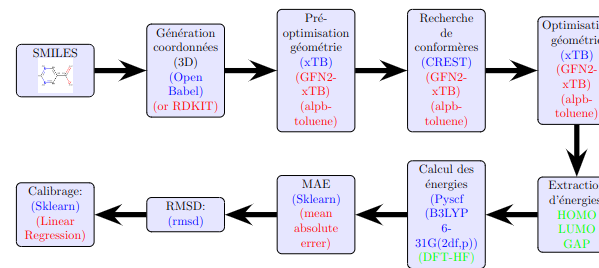

In [26]:

from IPython.display import Image
Image(filename='workflows.png', format='png', width=1500, height=1500)


---


## <a id='toc1_'></a>[**Problèmes rencontrés lors de l'implémentation du flux de travail**](#toc0_)

indiquant qu'il n'a pas été en mesure d'identifier une liaison disponibles

*niveau de recurrences des problemes:
faible (<font size="+1" color="7777ee">&#9733;</font>), 
moyenne (<font size="+1" color="7777ee">&#9733;&#9733;</font>), and
elevee (<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font>).*

<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#9733;</font> |
[Échec du processus de optimisation géométrique]() 
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[`RDKit` modifie rapidement la topologie, en contraste avec `OpenBabel`, qui conserve mieux la structure initiale lors des calculs.]()
<br>
<font size="+1" color="7777ee">&nbsp;&nbsp;&nbsp;&#9733;&#9733;</font> |
[Changement de topologie détecté après la pré-optimisation en entrée, en tant qu'artefact du niveau de théorie choisi `GFN`, entraînant l'arrêt anormal de la recherche de conformères avec CREST]()
<br>
<font size="+1" color="7777ee">&#9734;&#9733;&#9733;</font> |
[Échec d'`OpenBabel` lors de la tentative de définition de la stéréochimie indiquant qu'il n'a pas été en mesure d'identifier une liaison disponibles]()
<br>
<font size="+1" color="7777ee">&#9733;&#9733;&#9733;</font> |
[Échec du processus de pré-optimisation géométrique]()

---



# <h2 align="left" style="color: #cd7f32;"> **Workflow pour l'Optimisation des Molécules**  </h2>

---
##  <h1 style="color: #cd7f32;" align="below">  1.**Image SMILES** </h1>


<div class="alert alert-danger">
  <strong>  Nous commençons par une représentation SMILES de la molécule. Cette structure en 2D est convertie en coordonnées 3D à l'aide d'outils comme RDKit ou Open Babel. </strong>
</div>

---
##  <h1 style="color: #cd7f32;" align="below">   **2. Génération des Coordonnées 3D** </h1>


- <u><b><font color="blue">**Objectif:** </font>Transformer la représentation SMILES en une structure 3D.</b></u> 

- <u><b><font color="red">**Méthodes:** </font>RDKit ou Open Babel génèrent les coordonnées 3D à partir de la représentation SMILES.</b></u> 


- <u><b><font color="green">**Défis:** </font>Il peut y avoir des problèmes de conversion stéréochimique (e.g., OpenBabel peut échouer à identifier un lien spécifique).</b></u> 
 
---
##  <h1 style="color: #cd7f32;" align="below">  **3. Pré-optimisation avec xTB** </h1>


- <u><b><font color="blue">**Objectif:** </font>Pré-optimiser la géométrie moléculaire pour minimiser l'énergie.</b></u> 
- <u><b><font color="red">**Action si échec :** </font>Utiliser xTB avec différents niveaux de théorie (`GFN2`).</b></u> 


- <u><b><font color="green">**Défis:** </font>Vérifier la convergence de la géométrie après chaque pré-optimisation. Si l'optimisation échoue, changer de niveau de théorie et réessayer.</b></u> 
- <u><b><font color="yellow">**Action si échec:** </font>Si tous les niveaux de théorie échouent, retirer la molécule du dataset.</b></u> 

---
##  <h1 style="color: #cd7f32;" align="below"> **4. Recherche de Conformères avec CREST** </h1>

- <u><b><font color="blue">**Objectif:** </font>Explorer différentes conformations énergétiquement viables pour la molécule.</b></u> 
- <u><b><font color="red">**Action si échec :** </font>Utiliser CREST pour la recherche de conformères après la pré-optimisation.</b></u> 


- <u><b><font color="green">**Checkpoint :** </font>Vérifier la topologie après la recherche de conformères. Si un changement de topologie est détecté, réoptimiser en changeant de niveau de théorie.</b></u> 
- <u><b><font color="yellow">**Action si échec:** </font>Si toutes les tentatives échouent, retirer la molécule du dataset.</b></u> 

---
 
##  <h1 style="color: #cd7f32;" align="below"> **5. Calcul du MAE (Mean Absolute Error)** </h1>


- <u><b><font color="blue">**Objectif:** </font>Comparer les énergies obtenues avec RDKit et Open Babel.</b></u> 

- <u><b><font color="red">**Méthodes:** </font>Calculer le MAE pour évaluer la précision des méthodes.</b></u> 


- <u><b><font color="green">**Défis:** </font>Si Open Babel échoue lors de la conversion de fichiers (.xyz à .sdf), la molecule est explossée de la base de données</b></u> 
 
---
.

##  <h1 style="color: #cd7f32;" align="below">  **6. Calcul du RMSD (Root Mean Square Deviation)** </h1>


- <u><b><font color="blue">**Objectif:** </font>Mesurer les écarts géométriques entre les structures générées par RDKit et Open Babel.</b></u> 

- <u><b><font color="red">**Méthodes:** </font>Calculer le RMSD entre les géométries résultantes pour vérifier la cohérence des méthodes.</b></u> 

 
---
##  <h1 style="color: #cd7f32;" align="below"> **7. Calibrage avec Scikit-learn**</h1>


- <u><b><font color="blue">**Objectif:** </font>Ajuster les prédictions des propriétés moléculaires en fonction des données d'entraînement.</b></u> 

- <u><b><font color="red">**Méthodes:** </font>Utiliser Scikit-learn pour calibrer les modèles basés sur les résultats des calculs précédents.</b></u> 


- <u><b><font color="green">**Défis:** </font>Ajuster les hyperparamètres pour minimiser l'erreur prédictive.</b></u> 
 
---
.
<div class="alert alert-warning">
  <strong>Ce workflow structuré permet de gérer les problèmes potentiels tout en assurant la robustesse du pipeline d'analyse moléculaire.</strong>
</div>




### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers `best_GDB9.csv` et creer un DataFrame](#toc0_)



<div class="alert alert-info">
     <strong> 
<br> 


Le dataset initial utilisé dans cette étude est composé de `52 607` molécules (`best_GDB9.csv`) organiques stables constituées des éléments `C,H,O,N,F`. Ces molécules représentent un sous-ensemble du dataset `GDB-9`, qui fait partie d'une base de données plus vaste, le `GDB-17`, comprenant `166 milliards` de molécules organiques possibles.

Le dataset `GDB-9` contient des propriétés géométriques, énergétiques, et électroniques calculées pour environ `134 000` molécules, incluant les énergies des orbitales `HOMO`  et `LUMO`, ainsi que le gap énergétique entre ces deux niveaux. Toutes les propriétés ont été calculées au niveau de théorie `B3LYP/6-31G(2df,p)` en chimie quantique.

Les molécules sont constituées de jusqu'à neuf atomes lourds `(C, O, N, F)`, et les géométries minimales en énergie ont été déterminées. Pour la stœchiométrie prédominante, `C$_7$H$_{10}$O$_2$`, des propriétés supplémentaires comme les énergies, enthalpies et énergies libres d'atomisation ont été rapportées au niveau théorique `G4MP2`, un niveau plus précis de chimie quantique .</br>
    <strong> 
</div>


In [27]:
import pandas.util  # Assuming 'util' is an alias for pandas.util
import pandas as pd
# Read the CSV file

df = pd.read_csv("best_GDB9.csv")
#df=pd.read_pickle('qm9_samples.pkl')
# Filter rows with pce_1 > 10
#df.rename(columns={'Id':'smiles_key','Gap': 'GAP(eV)','HOMO': 'HOMO(eV)','LUMO': 'LUMO(eV)'}, inplace=True)
#df = df.loc[:, ['smiles_key', 'SMILES', 'HOMO(eV)','LUMO(eV)', 'GAP(eV)']]
df

,smiles_key,SMILES,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV)
0,gdb 6,C=O,-0.2670,-0.0406,0.2263,-7.265440,-1.104782,6.157937
1,gdb 11,CC=O,-0.2540,-0.0198,0.2342,-6.911692,-0.538785,6.372907
2,gdb 18,CC(C)=O,-0.2431,-0.0087,0.2344,-6.615088,-0.236739,6.378349
3,gdb 23,C#CC#C,-0.2599,-0.0214,0.2386,-7.072239,-0.582324,6.492637
4,gdb 24,C#CC#N,-0.3102,-0.0543,0.2559,-8.440972,-1.477578,6.963394
...,...,...,...,...,...,...,...,...
52602,gdb 133850,CC12C3C4CC(N13)C2=C4,-0.1864,-0.0059,0.1805,-5.072202,-0.160547,4.911655
52603,gdb 133853,OC12C3C1N1CC3N=C21,-0.2087,-0.0889,0.1198,-5.679016,-2.419092,3.259924
52604,gdb 133857,CC1C2C3C4=CCC13C24,-0.2014,-0.0515,0.1498,-5.480373,-1.401386,4.076266
52605,gdb 133859,CN1C2C3C4=CCC13C24,-0.2044,-0.0550,0.1494,-5.562007,-1.496626,4.065381



# <a id='toc1_1_'></a>[Analyse des Énergies et Optimisation de Conformers](#toc0_)
##  <a id='toc1_1_'></a>[Définition des Fonctions](#toc0_)
<hr>
<ul>
    <li><a href="#random">Fonction aléatoire avec random pour selectionner 22 molécules dans le dataframe</a></li>
    <li><a href="#pyscf">Fonction pour Extraire les Énergies HOMO, LUMO et GAP</a></li>
    <li><a href="#pyscf1">Fonction pour le Calcul des Énergies HOMO, LUMO et GAP</a></li>
    <li><a href="#loss">Fonction pour évaluer l'erreur dans les calculs.</a></li>
    <li><a href="#erreur">Fonction de l'Erreur</a></li>    
    <li><a href="#xtb">Fonction pour le Calcul XTB : Optimisation et Pré-optimisation</a></li>
    <li><a href="#crest">Fonction pour le Calcul CREST : Recherche de Conformers</a></li>
    <li><a href="#rdkit">Fonction pour la Génération des Coordonnées RDKit</a></li>
    <li><a href="#clear xtb-crest">Fonction pour le Nettoyage des Fichiers CREST et XTB</a></li>
    <li><a href="#rmsd">Fonction pour le Calcul des RMSD</a></li>

</ul>
<hr>









## <a id='toc1_1_'></a>[Définition d'une fonction aléatoire avec `random` pour selectionner 22 molécules dans le dataframe](#toc0_)

In [28]:
import random

In [29]:
# for reproductible results
random.seed(22)

In [30]:
positions = []
for i in range(15):
    position = random.randrange(len(df))
    positions.append(position)

In [31]:
df = df.loc[df.index.isin(positions)]
df.reset_index(drop=True, inplace=True)
df

,smiles_key,SMILES,HOMO,LUMO,Gap,HOMO(eV),LUMO(eV),Gap(eV)
0,gdb 4380,OC1=CN=CC(O)=N1,-0.2324,-0.0396,0.1928,-6.323926,-1.077571,5.246355
1,gdb 14590,O=CNC=NCC#C,-0.2557,-0.0226,0.2330,-6.957951,-0.614977,6.340253
2,gdb 22022,NC1=CC(C=NO1)=NO,-0.1954,-0.0444,0.1510,-5.317105,-1.208186,4.108919
3,gdb 24412,C1OC=NC2=C1OC=N2,-0.2215,-0.0270,0.1945,-6.027322,-0.734707,5.292615
4,gdb 29313,CC1=C(OC=C1N)C#N,-0.2187,-0.0340,0.1847,-5.951130,-0.925187,5.025943
5,gdb 42275,O=C(C#N)C1CC2OC12,-0.2774,-0.0884,0.1890,-7.548438,-2.405487,5.142952
6,gdb 43049,O=C1C2CN3C2CCC13,-0.2154,-0.0112,0.2042,-5.861333,-0.304768,5.556565
7,gdb 45561,O=C1CC2COCC2C1,-0.2427,-0.0219,0.2208,-6.604203,-0.595929,6.008274
8,gdb 51841,O=CCC1COCC1=O,-0.2476,-0.0402,0.2074,-6.737539,-1.093898,5.643641
9,gdb 68005,OC12CC(=O)C3OC1C23,-0.2408,-0.0289,0.2119,-6.552502,-0.786409,5.766093


#### <a id='toc1_1_'></a>[Representation Moleculaire et Descripteurs](#toc0_)
1.**Descripteurs 0D**. Concernant les discripteurs « Composition », ne fournissent aucune information sur la structure moléculaire ou la connectivité des atomes.

2.**Descripteurs 1D**. Lié à des ensembles de sous-structures telles que des groupes fonctionnels.

3.**Descripteurs 2D**. Fonctionnalités fournissant des informations sur la topologie moléculaire basées sur la représentation graphique des molécules.

4.**Descripteurs 3D**. Caractéristiques géométriques fournissant des informations sur les coordonnées spatiales des atomes d'une molécule.

5.**Descripteurs 4D**. Également appelés **descripteurs basés sur une grille**, introduisent une quatrième dimension caractérisant les interactions entre les molécules et les sites actifs d'un récepteur ou les multiples états conformationnels des molécules.

In [32]:
!xtb --version

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.7.1 (edcfbbe) compiled by 'albert@albert-system' on 2024-07-22

normal termination of xtb


In [33]:
!rmsd --version

/bin/bash: ligne 1: rmsd : commande introuvable


###  <a id='toc1_1_'></a>[Fonction pour Extraire les Énergies HOMO, LUMO et GAP](#toc0_)

Extraction des énergies `HOMO`, `LUMO` et `GAP` à partir des calculs réalisés avec `PySCF`.

In [34]:
from pyscf.data import nist
import time

#conversion en eV
au2ev = nist.HARTREE2EV

def find_homo_lumo(myhf, au2ev):
    """Function that returns the HOMO and LUMO index and the HOMO energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule to be evaluated.
    """
    # Index of HOMO and LUMO
    lumo_idx = myhf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the HOMO Homo-LUMO
    E_HOMO = myhf.mo_energy[homo_idx]*au2ev
    E_LUMO = myhf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g

###  <a id='toc1_1_'></a>[Fonction pour le Calcul des Énergies HOMO, LUMO et GAP](#toc0_)


Calcul des énergies `HOMO, LUMO et GAP` avec `PySCF` en utilisant la base `B3LYP/6-31G(2df,p)` via les méthodes `DFT et HF`.


In [35]:

from pyscf import dft,scf,gto
def pyscf_calculation(mol_xtb_xyz, directory):
    
    mol_pyscf = gto.Mole(
        atom=mol_xtb_xyz,
        charge=0,
        spin=0,
        basis="6-31G(2df,p)",
        symmetry=False,
        unit='Angstrom'
    )
    mol_pyscf.build()
    
    # Hartree-Fock calculation
    myhf = scf.RHF(mol_pyscf).run()
    
    # DFT calculation with B3LYP functional
    mdf = dft.RKS(mol_pyscf, xc="B3LYP").run()

    Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myhf, au2ev)
    Eks1_homo, Eks1_lumo, Eks1_g = find_homo_lumo(mdf, au2ev)
    
    
    return Eks_homo, Eks_lumo, Eks_g, Eks1_homo, Eks1_lumo, Eks1_g

In [36]:
import pyscf
pyscf.__version__

'2.6.2'

In [37]:

import subprocess,os 
from rdkit import Chem

from rdkit.Chem import AllChem
import rdkit
import subprocess as sp

import re


###  <a id='toc1_1_'></a>[Fonction de l'Erreur](#toc0_)



In [38]:
def log_error(file_path, process, error_message):
    with open("error_log.txt", "a") as error_file:
        error_file.write(f"Error processing {file_path} with {process}: {error_message}\n")

###  <a id='toc1_1_'></a>[Fonction pour le Calcul XTB : Optimisation et Pré-optimisation](#toc0_)

Calcul d'optimisation et pré-optimisation avec `XTB` en utilisant les modèles `GFN2`.

In [39]:
def run_xtb_process(path_xyz, output_xyz, log_path,path_output_xyz):
    try:
        start_xtb = time.time()
        xtb_process = sp.run(
            ["xtb", str(path_xyz), "--gfn", "2", "--ohess", "--opt", "vtight", "--uhf", "2", "--parallel", "4", "--alpb", "toluene"],
            stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True
        )
        xtb_time = time.time() - start_xtb
        sp.run(['cp', 'xtbopt.xyz', str(output_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        !obabel  xtbopt.xyz -O sample.sdf
        sp.run(['cp','sample.sdf', str(path_output_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        
        with open(log_path, "w") as fl:
            fl.write(xtb_process.stdout)
        return xtb_time, output_xyz, log_path  # Returning multiple values if needed
    except sp.CalledProcessError as e:
        log_error(path_xyz, "xtb", str(e))
        return None, None, None  # Returning multiple None if error occurs


###  <a id='toc1_1_'></a>[Fonction pour le Calcul CREST : Recherche de Conformers](#toc0_)

Calcul avec `CREST` pour la recherche de conformers en utilisant `GFN2`.

In [40]:
def run_crest_process(path_xyz, output_xyz, log_path):
    try:
        start_crest = time.time()
        crest_process = sp.run(
            ['crest', str(path_xyz), "--gfn", "2", '--mquick', '--prop', 'hess', '--noreftopo', '--uhf', '2', '-T', '4', '--alpb', 'toluene'],
            stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True
        )
        crest_time = time.time() - start_crest
        sp.run(['cp', 'crest_best.xyz', str(output_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        with open(log_path, "w") as fl1:
            fl1.write(crest_process.stdout)
        return crest_time, output_xyz,
    except sp.CalledProcessError as e:
        log_error(path_xyz, "crest", str(e))
        return None




###  <a id='toc1_1_'></a>[Fonction pour la Génération des Coordonnées RDKit](#toc0_)

Génération des coordonnées moléculaires avec `RDKit`.

In [41]:
def generate_3d_rdkit_conformation(smiles_key, smiles, working_dir):
    """
    Generate RDKit 3D optimized conformation (an initial geometry) of a molecule from SMILES
    and store the xyz coordinates in a file
    """
    # Setting path for xyz file of mol_rdkit object
    path_xyz = working_dir / f'{smiles_key}.xyz'

   
    if not path_xyz.exists():
         # Defines a molecule from its SMILES string
         mol_rdkit = Chem.MolFromSmiles(smiles)

         # Add explicit Hs
         mol_rdkit = Chem.AddHs(mol_rdkit)
         # Generates the initial 3D conformation of the molecule
         AllChem.EmbedMolecule(mol_rdkit)


        # Canonicalize the orientation of the conformation
         Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

        # Convert RDKit molecule to XYZ format
         mol_xyz = Chem.MolToXYZBlock(mol_rdkit)

     
         with open(path_xyz, "w") as f:
             f.write(mol_xyz)
           
             return path_xyz 

###  <a id='toc1_1_'></a>[Fonction pour le Nettoyage des Fichiers CREST et XTB](#toc0_)


Nettoyage des fichiers générés par `CREST et XTB`.

In [42]:
def clean_xtb_files1():
    #---------------------------------------------------------------------
        # Clean up output files from CREST processes
        #FIXME To call after each xtb function
        #---------------------------------------------------------------------
        sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original', 'cregen_0.tmp',
                'cregen_1.tmp', 'cre_members', 'crest_best.xyz', 'crest_conformers.xyz',
                'crest.energies', 'crest_rotamers.xyz', 'gfnff_charges', 'gfnff_topo',
                '.history.xyz', 'wbo', 'crest_property.xyz', 'gfnff_adjacency', '.UHF',
                'ensemble_energies.log', 'charges3', 'charges', 'molden.input', 'crest_0.mdrestart',
                'crest_dynamics.trj', 'crestopt.log', 'crest.restart', 'crest_input_copy.xyz','g98.out'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        # For folder
        sp.run(['rm', '-r', 'calculation.level.1'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)


In [43]:
def clean_xtb_files():
    #---------------------------------------------------------------------
    # Clean up output files from xtb
    #FIXME To call after running crest function and leave crest_best.xyz file
    #---------------------------------------------------------------------
    sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original' , 'vibspectrum', 'hessian', 'gfnff_charges', 'gfnff_topo', 'wfn.xtb', 'xtbhess.xyz',
            '.history.xyz', 'struc.xyz', 'wbo', 'xtbopt.xyz', 'xtbopt.log', '.xtboptok','g98.out',
            'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency', '.UHF',
            'ensemble_energies.log', 'charges3', 'charges', 'molden.input','test.smi','pat.xyz','sample.sdf'],
           stdout=sp.DEVNULL, stderr=sp.DEVNULL)
    # For folder
    sp.run(['rm', '-r', 'calculation.level.1', 'PROP'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

###  <a id='toc1_1_'></a>[ Fonction pour le Calcul des RMSD](#toc0_)

Calcul des valeurs `RMSD (Root Mean Square Deviation)`.

In [44]:
def run_rmsd(reference_xyz, comparison_xyz, path_rmsd):
    try:
        # Début du chronométrage
        start_rmsd = time.time()

        # Exécuter la commande calculate_rmsd
        rmsd_process = sp.run(['calculate_rmsd', str(reference_xyz), str(comparison_xyz)], 
                              stdout=sp.PIPE, stderr=sp.PIPE, text=True, check=True)
        rmsd_time = time.time() - start_rmsd

        # Sauvegarder la sortie RMSD dans le fichier
        with open(path_rmsd, 'w') as f:
            f.write(rmsd_process.stdout)

        # Lire la valeur RMSD depuis le fichier
        with open(path_rmsd, 'r') as f:
            rmsd_value = float(f.readline().strip())

        return rmsd_value

    except sp.CalledProcessError as e:
        log_1error(reference_xyz, "calculate_rmsd", str(e))

###  <a id='toc1_1_'></a>[ Fonction pour Extraire les Énergies HOMO, LUMO et GAP par XTB](#toc0_)


Extraction des énergies `HOMO, LUMO et GAP` à partir des calculs réalisés avec `XTB`.

In [45]:
def get_xtb_energy_1(path_xtb1_opt_log, smiles_key, working_dir):
        path_xtb1_opt_log = working_dir / f'{smiles_key}_xtb1_opt.log'
  
        if path_xtb1_opt_log.exists():
            with open(path_xtb1_opt_log, 'r') as f:
                text_content = f.readlines()

            # Read the output (implementation details omitted)

            output_index = [i for i in range(len(text_content)) if 'Property Printout' in text_content[i]]
            text_content = text_content[output_index[0]:]
            homo_data = [x for x in text_content if '(HOMO)' in x]
            lumo_data = [x for x in text_content if '(LUMO)' in x]
            homo_lumo_gap = [x for x in text_content if 'HOMO-LUMO GAP' in x]
            total = [x for x in text_content if 'TOTAL ENERGY' in x]
            total0= float(total[0].split(' ')[-5])
            total1=total0*au2ev
            total2=total0*627.509474
            lumo_val = float(lumo_data[0].split(' ')[-2])
            homo_val = float(homo_data[0].split(' ')[-2])
            homo_lumo_val = float(homo_lumo_gap[0].split(' ')[-5])
           
             # Write the properties to a single file (modify as needed)
            with open(os.path.join(working_dir, f'{smiles_key}_properties.txt'), 'a') as f:
                 f.write(f'LUMO: {lumo_val}\n')
                 f.write(f'HOMO: {homo_val}\n')
                 f.write(f'HOMO-LUMO GAP: {homo_lumo_val}\n')

        return  homo_lumo_val, total1, total2, homo_val, lumo_val
 
     





#  <a id='toc1_1_'></a>[Calcul des Propriétés](#toc0_)
<hr>
<ul>
    <li><a href="#rdkit1">À l'Aide des Fonctions Définies : Méthode RDKit</a></li>
    <li><a href="#openbabel">À l'Aide des Fonctions Définies : Méthode OpenBabel</a></li>


</ul>
<hr>

##  <a id='toc1_1_'></a>[À l'Aide des Fonctions Définies : Méthode RDKit](#toc0_)

Calcul des propriétés moléculaires en utilisant les fonctions définies avec `RDKit`.

In [46]:
import pandas as pd
import subprocess as sp
import time
from pathlib import Path

In [47]:




def calculate_properties_xtb_crest(df, working_dir):
    """
    Evaluate energy from xtb on the generated xyz coordinates for each entry in the DataFrame.
    
    Parameters:
    df: Pandas DataFrame containing 'SMILES' and 'Id' columns.
    working_dir: Directory where all files will be saved and processed.
    """
    yesso = ["smiles_key", "SMILES", "HOMO(eV)", "HOMO_xtb(eV)", "HOMO_HF(eV)", "HOMO_DFT(eV)", "LUMO(eV)", "LUMO_xtb(eV)", "LUMO_HF(eV)", "LUMO_DFT(eV)", "GAP(eV)", "GAP_xtb(eV)", "GAP_HF(eV)", "GAP_DFT(eV)", "ToT Energie(eV)", "ToT Energie(Kcal/mol)", "Times(s)", "rmsd_pre(A)", "rmsd_conf(A)", "rmsd1_conf(A)", "rmsd_opt(A)", "rmsd1_opt(A)", "rdkit_time", "xtb_time", "crest_time", "xtb_opt_time", "dft_time", "xtb_cal_time"]
    dtb = []
    df = df.copy()
    if isinstance(working_dir, str):
        working_dir = Path(working_dir)
    
    for i, row in df.iterrows():
        smiles = row["SMILES"]
        smiles_key = row["smiles_key"]
        smiles_key1 = f'gdb_{smiles_key}'
        HOMO = row["HOMO(eV)"]
        LUMO = row["LUMO(eV)"]
        GAP = row["Gap(eV)"]
        path_xyz = working_dir / f'{smiles_key}.xyz'
        path_xtb1_pre_opt_xyz = working_dir / f'{smiles_key}_xtb1_pre_opt.xyz'
        path_rmsd = working_dir / f'{smiles_key}_rmsd'
        path1_rmsd = working_dir / f'{smiles_key}_rmsd1'
        path2_rmsd = working_dir / f'{smiles_key}_rmsd2'
        path3_rmsd = working_dir / f'{smiles_key}_rmsd3'
        path4_rmsd = working_dir / f'{smiles_key}_rmsd4'
        path1_sdf = working_dir / f'{smiles_key}_xtb_pre_opt.sdf'
        path2_sdf = working_dir / f'{smiles_key}_xtb_opt.sdf'
        path_xtb1_opt_xyz = working_dir / f'{smiles_key}_xtb1_opt.xyz'
        path_best1_crest_xyz = working_dir / f'{smiles_key}_crest1_opt.xyz'
        path_xtb1_pre_opt_log = working_dir / f'{smiles_key}_xtb1_pre_opt.log'
        path_crest1_log = working_dir / f'{smiles_key}_crest1.log'
        path_xtb1_opt_log = working_dir / f'{smiles_key}_xtb1_opt.log'
        start_r = time.time() 
        path_xyz = generate_3d_rdkit_conformation(smiles_key, smiles, working_dir)
        r_time = time.time() - start_r
        
        xtb_time,path_xtb1_pre_opt_xyz,path_xtb1_pre_opt_log = run_xtb_process(str(path_xyz), str(path_xtb1_pre_opt_xyz), str(path_xtb1_pre_opt_log),str(path1_sdf))
        rmsd0=run_rmsd(str(path_xyz), str(path_xtb1_pre_opt_xyz),str(path_rmsd))
        #print(path_xtb1_pre_opt_xyz)
        clean_xtb_files()
        if xtb_time is None:
            continue
        
        crest_time,path_best1_crest_xyz = run_crest_process(str(path_xtb1_pre_opt_xyz), str(path_best1_crest_xyz), str(path_crest1_log))
        clean_xtb_files1()
        if crest_time is None:
            continue
        rmsd1=run_rmsd(path_best1_crest_xyz,str(path_xyz),str(path1_rmsd))


        start_xtb1 = time.time()
        xtb1_time,path_xtb1_opt_xyz,path_xtb1_opt_log = run_xtb_process(str(path_best1_crest_xyz), str(path_xtb1_opt_xyz), str(path_xtb1_opt_log),str(path2_sdf))
        if xtb1_time is None:
            continue
        clean_xtb_files()
        rmsd2=run_rmsd(str(path_xyz), str(path_xtb1_opt_xyz),str(path2_rmsd))

        rmsd3=run_rmsd(str(path_best1_crest_xyz), str(path_xtb1_pre_opt_xyz),str(path3_rmsd))

        rmsd21=run_rmsd(str(path_best1_crest_xyz), str(path_xtb1_opt_xyz),str(path4_rmsd))
        
        with open(path_xtb1_opt_xyz, 'r') as f:
            lines = f.readlines()

          #  Supprimer les deux premières lignes
        mol_xtb1_xyz = '\n'.join(lines[2:])
        
        # Additional computations like pyscf_calculation and get_xtb_energy_1
        start_dft = time.time()
        Eks_homo, Eks_lumo, Eks_g, Eks1_homo, Eks1_lumo, Eks1_g = pyscf_calculation(mol_xtb1_xyz, working_dir)
        dft_time = time.time() - start_dft

        start_xtb1 = time.time()
        homo_lumo_val, total1, total2, homo_val, lumo_val = get_xtb_energy_1(path_xtb1_opt_log, smiles_key, working_dir)
        xtb2_time = time.time() - start_xtb1
        
        elapsed1_xtb = time.time() - start_r 
        #rmsd0, rmsd1, rmsd2, rmsd3, rmsd21

        dtb.append([
            smiles_key, smiles, HOMO, homo_val, Eks_homo, Eks1_homo, LUMO, lumo_val, Eks_lumo, Eks1_lumo, GAP, homo_lumo_val, Eks_g, Eks1_g, total2, total1,
            elapsed1_xtb,rmsd0, rmsd1, rmsd2, rmsd3, rmsd21,r_time, xtb_time, crest_time, xtb1_time, dft_time, xtb2_time
        ])

    df_ENERGY = pd.DataFrame(dtb, columns=yesso)
    
    return df_ENERGY




In [48]:
import os
MY_crest31_GDB9_DATA = os.path.join(os.getcwd(),'MY_crest31_GDB9_DATA')
os.makedirs(MY_crest31_GDB9_DATA, exist_ok=True)

In [49]:
df_ENEGY= calculate_properties_xtb_crest(df,MY_crest31_GDB9_DATA)
df_ENEGY.to_csv('rdkit_dataset_Gdb9_6-7-1.csv', index=False)

1 molecule converted


1 molecule converted
converged SCF energy = -412.448406232789
converged SCF energy = -414.795244601985
1 molecule converted
1 molecule converted
converged SCF energy = -376.448469751938
converged SCF energy = -378.718782838489
1 molecule converted
1 molecule converted
converged SCF energy = -467.240583440052
converged SCF energy = -469.94479367549
1 molecule converted
1 molecule converted
converged SCF energy = -450.219917007852
converged SCF energy = -452.816840725736
1 molecule converted
1 molecule converted
converged SCF energy = -414.422081713266
converged SCF energy = -416.939241625029
1 molecule converted
1 molecule converted
converged SCF energy = -434.196824525263
converged SCF energy = -436.731674922665
1 molecule converted
1 molecule converted
converged SCF energy = -399.539949063412
converged SCF energy = -402.044666481389
1 molecule converted
1 molecule converted
converged SCF energy = -420.598071688904
converged SCF energy = -423.179377529192
1 molecule converted
1 molecul

[22:53:45] Cannot write molecules with no conformers to XYZ block


1 molecule converted
1 molecule converted
converged SCF energy = -434.122795356073
converged SCF energy = -436.695879488814
1 molecule converted
1 molecule converted
converged SCF energy = -447.582320699788
converged SCF energy = -450.231226740587
1 molecule converted
1 molecule converted
converged SCF energy = -475.440430749097
converged SCF energy = -478.097335879758


In [50]:
df_ENEGY

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_conf(A),rmsd1_conf(A),rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time
0,gdb 4380,OC1=CN=CC(O)=N1,-6.323926,-7.3872,-8.821188,-6.337653,-1.077571,-6.2732,2.613285,-1.214299,...,0.497735,0.498489,0.442851,0.001093,0.007378,0.464814,18.873589,0.349503,108.931516,0.005626
1,gdb 14590,O=CNC=NCC#C,-6.957951,-7.5316,-8.115376,-4.519007,-0.614977,-5.4118,2.545011,-1.791970,...,1.289066,1.338304,0.045885,0.061532,0.014500,1.810822,22.262102,0.528628,196.236482,0.002488
2,gdb 22022,NC1=CC(C=NO1)=NO,-5.317105,-8.0963,-6.909303,-3.798654,-1.208186,-6.3397,1.171171,-2.179201,...,0.544414,0.528906,0.021675,0.021134,0.008974,0.834605,21.292153,0.492116,284.936671,0.000946
3,gdb 24412,C1OC=NC2=C1OC=N2,-6.027322,-8.0897,-7.660270,-5.449145,-0.734707,-6.8477,2.044460,-1.879299,...,0.252794,0.252549,0.001285,0.001203,0.007274,0.582878,22.364269,0.596792,252.108833,0.001007
4,gdb 29313,CC1=C(OC=C1N)C#N,-5.951130,-7.1937,-7.705081,-5.374673,-0.925187,-5.6065,2.228064,-1.243396,...,0.641023,0.647788,0.773498,0.033059,0.029809,0.957825,26.611199,0.571771,261.670560,0.001268
5,gdb 42275,O=C(C#N)C1CC2OC12,-7.548438,-9.0785,-11.323476,-7.469861,-2.405487,-6.6082,1.029521,-3.093560,...,0.724063,0.724673,0.007033,0.003434,0.012762,0.853618,28.356463,0.387690,278.242789,0.000952
6,gdb 43049,O=C1C2CN3C2CCC13,-5.861333,-7.1732,-9.312434,-5.645659,-0.304768,-1.5784,2.823399,-1.706127,...,0.236633,0.237682,0.289282,0.002061,0.020392,1.686964,37.155186,1.228569,426.602921,0.000738
7,gdb 45561,O=C1CC2COCC2C1,-6.604203,-7.5445,-10.797117,-6.603687,-0.595929,0.0956,2.452416,-1.958620,...,0.356095,0.356145,0.015030,0.002978,0.015748,2.364390,48.184232,1.084134,360.798448,0.008858
8,gdb 51841,O=CCC1COCC1=O,-6.737539,-7.5263,-9.779054,-5.446853,-1.093898,-7.1244,3.510330,-1.135114,...,0.944106,0.928694,0.500299,0.024112,0.030051,2.339990,39.069960,0.981671,378.494300,0.002568
9,gdb 68005,OC12CC(=O)C3OC1C23,-6.552502,-7.5417,-10.270597,-6.414374,-0.786409,-3.3874,2.582461,-1.906570,...,0.371658,0.367696,0.238343,0.011976,0.009700,1.360296,34.817528,0.811707,357.414132,0.001341




##  <a id='toc1_1_'></a>[À l'Aide des Fonctions Définies : Méthode OpenBabel](#toc0_)

Calcul des propriétés moléculaires en utilisant les fonctions définies avec `OpenBabel.



In [51]:
def calculate_properties_xtb_crest1(df, working_dir):
    """
    Evaluate energy from xtb on the generated xyz coordinates for each entry in the DataFrame.
    
    Parameters:
    df: Pandas DataFrame containing 'SMILES' and 'Id' columns.
    working_dir: Directory where all files will be saved and processed.
    """
    yesso = ["smiles_key", "SMILES", "HOMO(eV)", "HOMO_xtb(eV)", "HOMO_HF(eV)", "HOMO_DFT(eV)", "LUMO(eV)", "LUMO_xtb(eV)", "LUMO_HF(eV)", "LUMO_DFT(eV)", "GAP(eV)", "GAP_xtb(eV)", "GAP_HF(eV)", "GAP_DFT(eV)", "ToT Energie(eV)", "ToT Energie(Kcal/mol)", "Times(s)", "rmsd_pre(A)", "rmsd_conf(A)", "rmsd1_conf(A)", "rmsd_opt(A)", "rmsd1_opt(A)", "rdkit_time", "xtb_time", "crest_time", "xtb_opt_time", "dft_time", "xtb_cal_time"]
    dtb = []
    df = df.copy()
    if isinstance(working_dir, str):
        working_dir = Path(working_dir)
    
    for i, row in df.iterrows():
        smiles = row["SMILES"]
        smiles_key = row["smiles_key"]
        smiles_key1 = f'gdb_{smiles_key}'
        HOMO = row["HOMO(eV)"]
        LUMO = row["LUMO(eV)"]
        GAP = row["Gap(eV)"]
        path_xyz = working_dir / f'{smiles_key}.xyz'
        path_xtb1_pre_opt_xyz = working_dir / f'{smiles_key}_xtb1_pre_opt.xyz'
        path_rmsd = working_dir / f'{smiles_key}_rmsd'
        path1_rmsd = working_dir / f'{smiles_key}_rmsd1'
        path2_rmsd = working_dir / f'{smiles_key}_rmsd2'
        path3_rmsd = working_dir / f'{smiles_key}_rmsd3'
        path4_rmsd = working_dir / f'{smiles_key}_rmsd4'
        path1_sdf = working_dir / f'{smiles_key}_xtb_pre_opt.sdf'
        path2_sdf = working_dir / f'{smiles_key}_xtb_opt.sdf'
        path_xtb1_opt_xyz = working_dir / f'{smiles_key}_xtb1_opt.xyz'
        path_best1_crest_xyz = working_dir / f'{smiles_key}_crest1_opt.xyz'
        path_xtb1_pre_opt_log = working_dir / f'{smiles_key}_xtb1_pre_opt.log'
        path_crest1_log = working_dir / f'{smiles_key}_crest1.log'
        path_xtb1_opt_log = working_dir / f'{smiles_key}_xtb1_opt.log'
        with open('test.smi', 'w') as f: 
             f.writelines([smiles])

        start_r = time.time() 
        !obabel test.smi --gen3D -O pat.xyz
        sp.run(['cp', 'pat.xyz', str(path_xyz)], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
        r_time = time.time() - start_r
        print(path_xyz)
        xtb_time,path_xtb1_pre_opt_xyz,path_xtb1_pre_opt_log = run_xtb_process(str(path_xyz), str(path_xtb1_pre_opt_xyz), str(path_xtb1_pre_opt_log),str(path1_sdf))
        rmsd0=run_rmsd(str(path_xyz), str(path_xtb1_pre_opt_xyz),str(path_rmsd))

        clean_xtb_files()
        if xtb_time is None:
            continue
        
        crest_time,path_best1_crest_xyz = run_crest_process(str(path_xtb1_pre_opt_xyz), str(path_best1_crest_xyz), str(path_crest1_log))
        clean_xtb_files1()
        if crest_time is None:
            continue
        rmsd1=run_rmsd(path_best1_crest_xyz,str(path_xyz),str(path1_rmsd))


        start_xtb1 = time.time()
        xtb1_time,path_xtb1_opt_xyz,path_xtb1_opt_log = run_xtb_process(path_best1_crest_xyz, path_xtb1_opt_xyz, path_xtb1_opt_log,str(path2_sdf))
        if xtb1_time is None:
            continue
        clean_xtb_files()
        rmsd2=run_rmsd(str(path_xyz), str(path_xtb1_opt_xyz),str(path2_rmsd))

        rmsd3=run_rmsd(str(path_best1_crest_xyz), str(path_xtb1_pre_opt_xyz),str(path3_rmsd))

        rmsd21=run_rmsd(str(path_best1_crest_xyz), str(path_xtb1_opt_xyz),str(path4_rmsd))
        
        with open(path_xtb1_opt_xyz, 'r') as f:
            lines = f.readlines()

          #  Supprimer les deux premières lignes
        mol_xtb1_xyz = '\n'.join(lines[2:])
        
        # Additional computations like pyscf_calculation and get_xtb_energy_1
        start_dft = time.time()
        Eks_homo, Eks_lumo, Eks_g, Eks1_homo, Eks1_lumo, Eks1_g = pyscf_calculation(mol_xtb1_xyz, working_dir)
        dft_time = time.time() - start_dft

        start_xtb1 = time.time()
        homo_lumo_val, total1, total2, homo_val, lumo_val = get_xtb_energy_1(path_xtb1_opt_log, smiles_key, working_dir)
        xtb2_time = time.time() - start_xtb1
        
        elapsed1_xtb = time.time() - start_r 
        #rmsd0, rmsd1, rmsd2, rmsd3, rmsd21

        dtb.append([
            smiles_key, smiles, HOMO, homo_val, Eks_homo, Eks1_homo, LUMO, lumo_val, Eks_lumo, Eks1_lumo, GAP, homo_lumo_val, Eks_g, Eks1_g, total2, total1,
            elapsed1_xtb,rmsd0, rmsd1, rmsd2, rmsd3, rmsd21,r_time, xtb_time, crest_time, xtb1_time, dft_time, xtb2_time
        ])

    df_ENERGY = pd.DataFrame(dtb, columns=yesso)
    
    return df_ENERGY


In [52]:
import os
MY_crest32_GDB9_DATA = os.path.join(os.getcwd(),'MY_crest32_GDB9_DATA')
os.makedirs(MY_crest32_GDB9_DATA, exist_ok=True)

In [53]:
df_ENEGY1= calculate_properties_xtb_crest1(df,MY_crest32_GDB9_DATA)
df_ENEGY1.to_csv('OBABEL_dataset_Gdb9_6-7-1.csv', index=False)

1 molecule converted
/home/mvotokongo/Documents/MY WORK/MY_crest32_GDB9_DATA/gdb 4380.xyz


1 molecule converted
1 molecule converted
converged SCF energy = -412.44840859967
converged SCF energy = -414.795246854281
1 molecule converted
/home/mvotokongo/Documents/MY WORK/MY_crest32_GDB9_DATA/gdb 14590.xyz
1 molecule converted
1 molecule converted
converged SCF energy = -376.469872976399
converged SCF energy = -378.7356551846
1 molecule converted
/home/mvotokongo/Documents/MY WORK/MY_crest32_GDB9_DATA/gdb 22022.xyz
1 molecule converted
1 molecule converted
converged SCF energy = -467.240458075324
converged SCF energy = -469.944655885594
1 molecule converted
/home/mvotokongo/Documents/MY WORK/MY_crest32_GDB9_DATA/gdb 24412.xyz
1 molecule converted
1 molecule converted
converged SCF energy = -450.219913463866
converged SCF energy = -452.816833124481
1 molecule converted
/home/mvotokongo/Documents/MY WORK/MY_crest32_GDB9_DATA/gdb 29313.xyz
1 molecule converted
1 molecule converted
converged SCF energy = -414.422084352276
converged SCF energy = -416.939245324932
1 molecule converte

In [62]:
df=df_ENEGY
df

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_conf(A),rmsd1_conf(A),rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time
0,gdb 4380,OC1=CN=CC(O)=N1,-6.323926,-7.3872,-8.821188,-6.337653,-1.077571,-6.2732,2.613285,-1.214299,...,0.497735,0.498489,0.442851,0.001093,0.007378,0.464814,18.873589,0.349503,108.931516,0.005626
1,gdb 14590,O=CNC=NCC#C,-6.957951,-7.5316,-8.115376,-4.519007,-0.614977,-5.4118,2.545011,-1.791970,...,1.289066,1.338304,0.045885,0.061532,0.014500,1.810822,22.262102,0.528628,196.236482,0.002488
2,gdb 22022,NC1=CC(C=NO1)=NO,-5.317105,-8.0963,-6.909303,-3.798654,-1.208186,-6.3397,1.171171,-2.179201,...,0.544414,0.528906,0.021675,0.021134,0.008974,0.834605,21.292153,0.492116,284.936671,0.000946
3,gdb 24412,C1OC=NC2=C1OC=N2,-6.027322,-8.0897,-7.660270,-5.449145,-0.734707,-6.8477,2.044460,-1.879299,...,0.252794,0.252549,0.001285,0.001203,0.007274,0.582878,22.364269,0.596792,252.108833,0.001007
4,gdb 29313,CC1=C(OC=C1N)C#N,-5.951130,-7.1937,-7.705081,-5.374673,-0.925187,-5.6065,2.228064,-1.243396,...,0.641023,0.647788,0.773498,0.033059,0.029809,0.957825,26.611199,0.571771,261.670560,0.001268
5,gdb 42275,O=C(C#N)C1CC2OC12,-7.548438,-9.0785,-11.323476,-7.469861,-2.405487,-6.6082,1.029521,-3.093560,...,0.724063,0.724673,0.007033,0.003434,0.012762,0.853618,28.356463,0.387690,278.242789,0.000952
6,gdb 43049,O=C1C2CN3C2CCC13,-5.861333,-7.1732,-9.312434,-5.645659,-0.304768,-1.5784,2.823399,-1.706127,...,0.236633,0.237682,0.289282,0.002061,0.020392,1.686964,37.155186,1.228569,426.602921,0.000738
7,gdb 45561,O=C1CC2COCC2C1,-6.604203,-7.5445,-10.797117,-6.603687,-0.595929,0.0956,2.452416,-1.958620,...,0.356095,0.356145,0.015030,0.002978,0.015748,2.364390,48.184232,1.084134,360.798448,0.008858
8,gdb 51841,O=CCC1COCC1=O,-6.737539,-7.5263,-9.779054,-5.446853,-1.093898,-7.1244,3.510330,-1.135114,...,0.944106,0.928694,0.500299,0.024112,0.030051,2.339990,39.069960,0.981671,378.494300,0.002568
9,gdb 68005,OC12CC(=O)C3OC1C23,-6.552502,-7.5417,-10.270597,-6.414374,-0.786409,-3.3874,2.582461,-1.906570,...,0.371658,0.367696,0.238343,0.011976,0.009700,1.360296,34.817528,0.811707,357.414132,0.001341


In [72]:

df = pd.read_csv('OBABEL_dataset_Gdb9_6-7-1.csv')
df1 = pd.read_csv('rdkit_dataset_Gdb9_6-7-1.csv')

In [73]:
df=df.drop(11, inplace=False)
df.to_csv('OBABEL_Dataset_Gdb9_6-7-1.csv', index=False)

In [74]:
df = pd.read_csv('OBABEL_Dataset_Gdb9_6-7-1.csv')
df

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_conf(A),rmsd1_conf(A),rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time
0,gdb 4380,OC1=CN=CC(O)=N1,-6.323926,-7.3872,-8.821139,-6.337653,-1.077571,-6.2732,2.613395,-1.214202,...,0.665604,0.666233,0.666778,0.000966,0.669849,0.546041,22.026873,0.430283,134.432223,0.001166
1,gdb 14590,O=CNC=NCC#C,-6.957951,-7.7873,-8.877091,-5.255156,-0.614977,-5.4648,2.121473,-2.150999,...,1.395633,1.389107,1.702408,0.025521,0.425527,0.940878,23.041233,0.422350,193.906636,0.001833
2,gdb 22022,NC1=CC(C=NO1)=NO,-5.317105,-8.0969,-6.908038,-3.795975,-1.208186,-6.3398,1.169309,-2.180662,...,0.363327,0.344197,0.098498,0.024695,0.395967,1.400363,33.107385,0.599040,364.000784,0.001186
3,gdb 24412,C1OC=NC2=C1OC=N2,-6.027322,-8.0902,-7.660670,-5.449417,-0.734707,-6.8477,2.044010,-1.879592,...,0.233296,0.232777,0.002541,0.001388,0.346774,0.700061,23.931516,0.391980,269.191491,0.006325
4,gdb 29313,CC1=C(OC=C1N)C#N,-5.951130,-7.1936,-7.705140,-5.374674,-0.925187,-5.6062,2.228067,-1.243358,...,0.801868,0.794752,0.799195,0.036617,0.481716,0.726604,37.841400,1.321705,364.237818,0.008307
5,gdb 42275,O=C(C#N)C1CC2OC12,-7.548438,-9.0785,-11.323786,-7.470215,-2.405487,-6.6082,1.029461,-3.093480,...,0.253080,0.250890,0.013359,0.003932,3.580392,1.326396,48.624266,0.617672,370.638800,0.001349
6,gdb 43049,O=C1C2CN3C2CCC13,-5.861333,-7.0659,-9.341106,-5.615523,-0.304768,-1.5964,2.929026,-1.607115,...,0.224354,0.223240,0.004007,0.003960,7.489861,2.145267,48.044566,2.010584,491.450329,0.002252
7,gdb 45561,O=C1CC2COCC2C1,-6.604203,-7.5445,-10.796833,-6.603563,-0.595929,0.0961,2.452577,-1.958521,...,0.511906,0.511264,0.441885,0.002815,3.407747,2.278172,51.941771,1.032744,404.625456,0.006109
8,gdb 51841,O=CCC1COCC1=O,-6.737539,-7.8121,-10.074305,-5.846232,-1.093898,-7.5038,2.695154,-1.769761,...,1.359898,1.358935,1.385046,0.007255,2.262770,1.453515,39.036975,0.827146,372.398437,0.002722
9,gdb 68005,OC12CC(=O)C3OC1C23,-6.552502,-7.5416,-10.270240,-6.414115,-0.786409,-3.3874,2.582490,-1.906543,...,0.358427,0.353456,0.238246,0.010475,2.900485,0.725147,33.984899,0.640131,416.866951,0.001039


## <a id='toc1_'></a>[Qu'est-ce que le MAE (Mean Absolute Error) ?](#toc0_)

### L'Erreur Absolue Moyenne (MAE) est une mesure statistique utilisée pour quantifier la précision des prédictions d'un modèle en fonction des valeurs réelles observées. Elle représente la moyenne des erreurs absolues entre les valeurs prédites et les valeurs observées, sans tenir compte du signe de l'erreur. L'équation pour calculer le MAE est la suivante :

$$
\mathtt{MAE} = \frac{1}{N} \sum_{i=1}^{N} |P_i - O_i|
$$

où :
- \( P_i \) représente les valeurs prédites,
- \( O_i \) représente les valeurs observées,
- \( N \) est le nombre total de points de données.

### <h1 style="color: #cd7f32;" align="below"> **Exemples d'interprétation des valeurs de MAE :** </h1>

- **MAE faible (< 0.1)** : Les prédictions sont très proches des valeurs réelles, indiquant une grande précision.
- **MAE moyen (0.1 - 0.5)** : Les prédictions sont modérément proches des valeurs observées, mais il existe des erreurs notables.
- **MAE élevé (0.5 - 1.0)** : Il existe des écarts substantiels entre les valeurs prédites et réelles, indiquant une diminution de la précision.
- **MAE très élevé (> 1.0)** : Les prédictions sont largement incorrectes par rapport aux valeurs réelles.

---

### <h1 style="color: #cd7f32;" align="below"> **Remarque :** </h1>
<div class="alert alert-warning">
  <strong>Le MAE est couramment utilisé en apprentissage automatique pour évaluer les modèles de régression. Il est apprécié pour sa simplicité et sa capacité à mesurer les erreurs de manière intuitive. Toutefois, son interprétation doit être contextualisée en fonction du domaine d'application et des caractéristiques spécifiques des données.</strong>
</div>

---

<div class="alert alert-info">
  <strong>
    Cet exemple de calcul du MAE peut être intégré dans un notebook pour illustrer son utilisation dans l'évaluation des modèles de régression ou pour comparer différentes méthodes de calcul d'énergie dans les simulations moléculaires.
  </strong>
</div>




##  <a id='toc1_1_'></a>[CALCUL DU MAE](#toc0_)
<hr>
<ul>
    <li><a href="#rdkit1">MAE RDKT-OPENBABEL:XTB</a></li>
    <li><a href="#openbabel">MAE RDKT-OPENBABEL:DFT</a></li>
    <li><a href="#pyscf1">MAE RDKT-OPENBABEL:HF</a></li>

</ul>
<hr>


###  <a id='toc1_1_'></a>[COMPARAISON DES MAE RDKT-OPENBABEL:XTB](#toc0_)

<>:24: SyntaxWarning: invalid escape sequence '\q'
<>:24: SyntaxWarning: invalid escape sequence '\q'
/tmp/ipykernel_15907/3439160964.py:24: SyntaxWarning: invalid escape sequence '\q'
  ax.plot(df[actual_col][:], '-x', label='QM9$\quad$'+label)


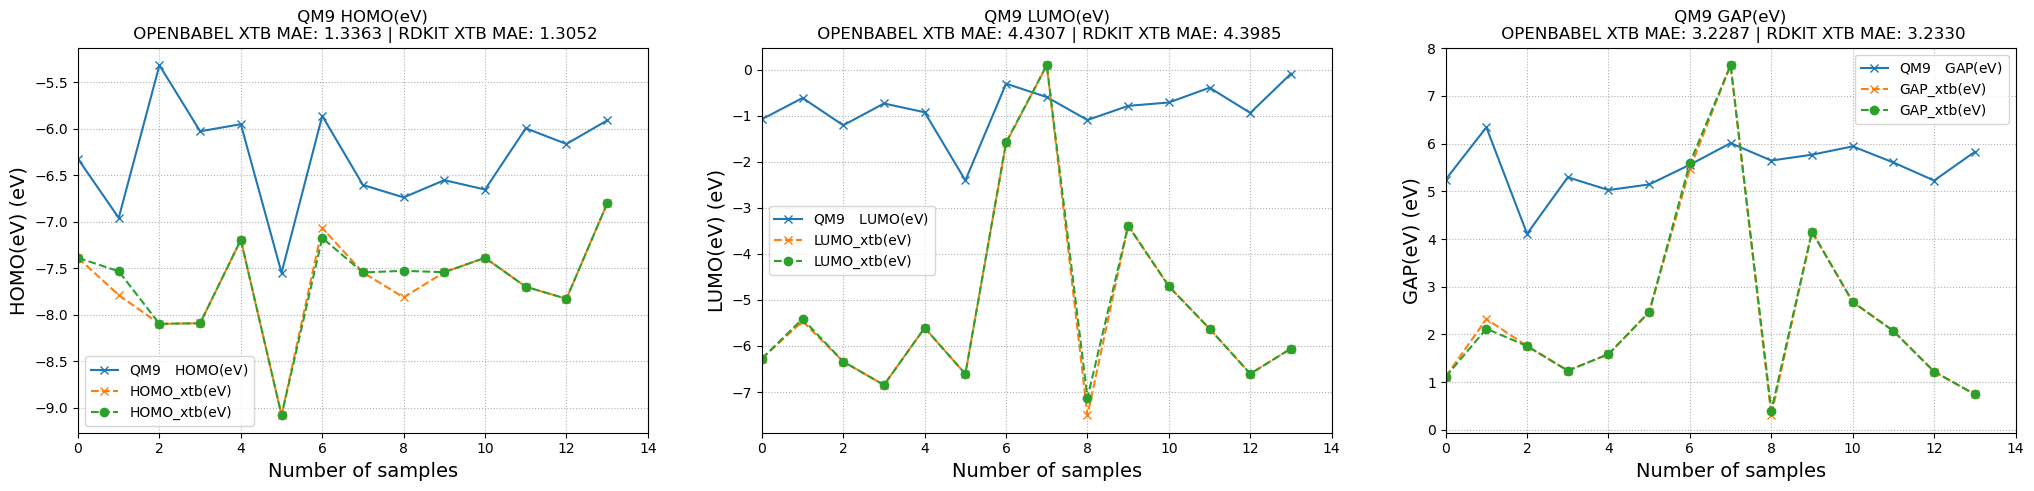

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Supposons que df1 et df2 soient déjà définis
qm9_results = {'HOMO_xtb(eV)-MAE': [], 'LUMO_xtb(eV)-MAE': [], 'GAP_xtb(eV)-MAE': []}

fig, axes = plt.subplots(1, 3, figsize=(25, 5))

actual = ['HOMO(eV)','LUMO(eV)','GAP(eV)']
lot1 = ['HOMO_xtb(eV)','LUMO_xtb(eV)','GAP_xtb(eV)']
lot2 = ['HOMO_xtb(eV)','LUMO_xtb(eV)','GAP_xtb(eV)']
labels = ['HOMO(eV)','LUMO(eV)','GAP(eV)']

for actual_col, lot1_col, lot2_col, label, ax in zip(actual, lot1, lot2, labels, axes):
    
    OB_mae = mean_absolute_error(df[actual_col][:], df[lot1_col][:])
    RDKIT_mae = mean_absolute_error(df[actual_col][:], df1[lot2_col][:])

    qm9_results[lot1_col+'-MAE'].append(OB_mae)
    qm9_results[lot2_col+'-MAE'].append(RDKIT_mae)
    
    # Affichage des résultats avec des points uniques pour chaque MAE
    ax.plot(df[actual_col][:], '-x', label='QM9$\quad$'+label)
    ax.plot(df[lot1_col][:], '--x', label=lot1_col)
    ax.plot(df1[lot2_col][:], '--o', label=lot2_col)
    
    ax.grid(linestyle=':')
    ax.set_xlim([0, len(df1)])
    ax.set_title(" QM9 {} \n OPENBABEL XTB MAE: {:.4f} | RDKIT XTB MAE: {:.4f}".format(label, OB_mae, RDKIT_mae))
    
    ax.legend(loc='best')
    ax.set_xlabel('Number of samples', fontsize=14)
    ax.set_ylabel('{} (eV)'.format(label), fontsize=14)

qm9_results_df = pd.DataFrame(qm9_results)


plt.show()


------
<font style="font-size:28px;" align="left"><b> <font color="blue"> COMPARAISON 1.1: </font> MAE xTB</b></font>
<br>
<a id="task2"></a>
<h3>  </h3>

<u><b>Soit le tabeaux comparatif `openbabel` et `rdkit` </b></u> comportant les `MAE` des energies `GAP HOMO et LUMO` :



$
 \begin{array}{|c|c|c|c|} \mathbf{\textcolor{green}{METHODE}}   & \mathbf{{MAE}_{xTB}(HOMO)} & \mathbf{{MAE}_{xTB}(LUMO)} & \mathbf{{MAE}_{xTB}(GAP)}\\ \hline \mathbf{OPENBABEL} & 1.3363 & 4.4307& \textcolor{red}{3.2287} \\ \hline  \mathbf{RDKIT} &\textcolor{red}{1.3052} &\textcolor{red}{4.3985}& 3.2330 \\ \hline \end{array}
$

Nous remarquons que les valeurs genere avec les coordonnes `rdkit` sont plus minimales que celle avec `openbabel`.

----

###  <a id='toc1_1_'></a>[COMPARAISON DES MAE RDKT-OPENBABEL:DFT](#toc0_)

<>:24: SyntaxWarning: invalid escape sequence '\q'
<>:24: SyntaxWarning: invalid escape sequence '\q'
/tmp/ipykernel_15907/916103738.py:24: SyntaxWarning: invalid escape sequence '\q'
  ax.plot(df[actual_col][:], '-x', label='QM9$\quad$'+label)


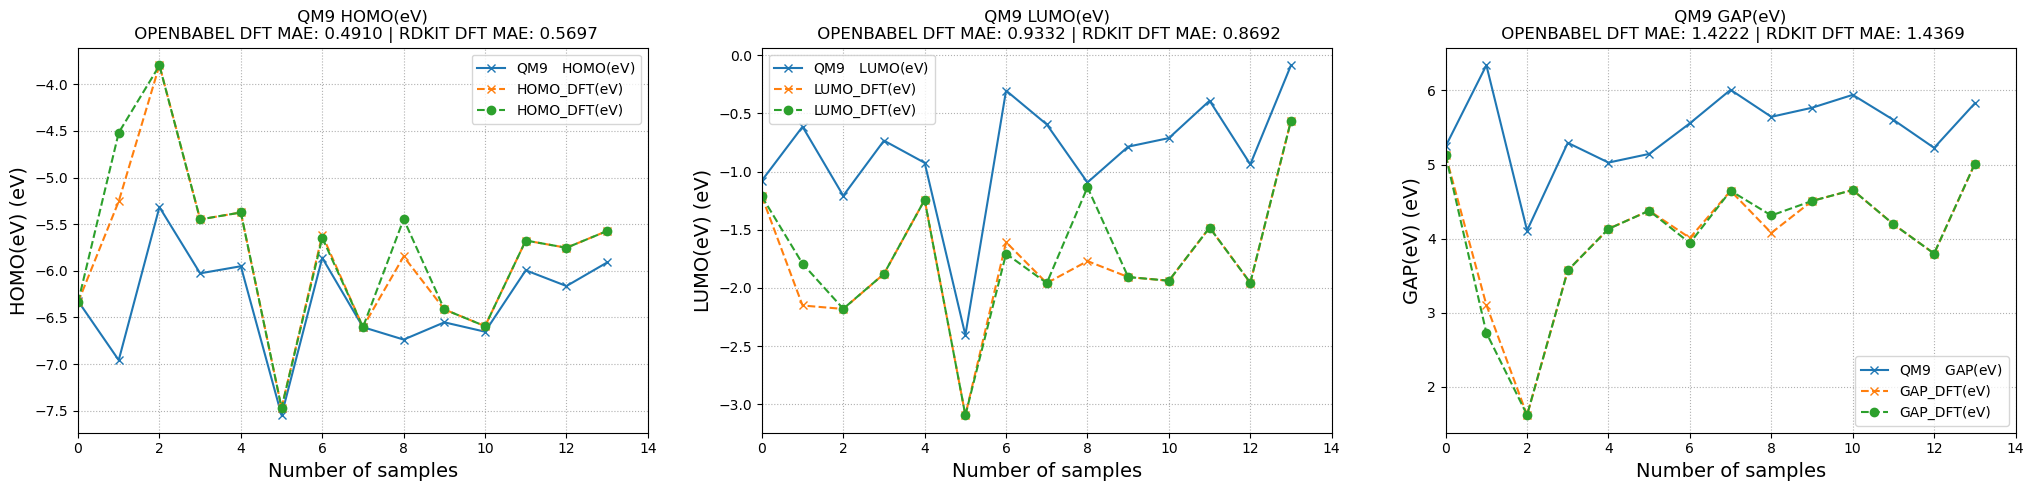

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Supposons que df1 et df2 soient déjà définis
qm9_results = {'HOMO_DFT(eV)-MAE': [], 'LUMO_DFT(eV)-MAE': [], 'GAP_DFT(eV)-MAE': []}

fig, axes = plt.subplots(1, 3, figsize=(25, 5))

actual = ['HOMO(eV)','LUMO(eV)','GAP(eV)']
lot1 = ['HOMO_DFT(eV)','LUMO_DFT(eV)','GAP_DFT(eV)']
lot2 = ['HOMO_DFT(eV)','LUMO_DFT(eV)','GAP_DFT(eV)']
labels = ['HOMO(eV)','LUMO(eV)','GAP(eV)']

for actual_col, lot1_col, lot2_col, label, ax in zip(actual, lot1, lot2, labels, axes):
    
    OB_mae = mean_absolute_error(df[actual_col][:], df[lot1_col][:])
    RDKIT_mae = mean_absolute_error(df[actual_col][:], df1[lot2_col][:])

    qm9_results[lot1_col+'-MAE'].append(OB_mae)
    qm9_results[lot2_col+'-MAE'].append(RDKIT_mae)
    
    # Affichage des résultats avec des points uniques pour chaque MAE
    ax.plot(df[actual_col][:], '-x', label='QM9$\quad$'+label)
    ax.plot(df[lot1_col][:], '--x', label=lot1_col)
    ax.plot(df1[lot2_col][:], '--o', label=lot2_col)
    
    ax.grid(linestyle=':')
    ax.set_xlim([0, len(df1)])
    ax.set_title(" QM9 {} \n OPENBABEL DFT MAE: {:.4f} | RDKIT DFT MAE: {:.4f}".format(label, OB_mae, RDKIT_mae))
    
    ax.legend(loc='best')
    ax.set_xlabel('Number of samples', fontsize=14)
    ax.set_ylabel('{} (eV)'.format(label), fontsize=14)

qm9_results_df = pd.DataFrame(qm9_results)


plt.show()



------
<font style="font-size:28px;" align="left"><b> <font color="blue"> COMPARAISON 1.2: </font> MAE DFT </b></font>
<br>
<a id="task2"></a>
<h3>  </h3>

<u><b>Soit le tabeaux comparatif `openbabel` et `rdkit` </b></u> comportant les `MAE` des energies `GAP HOMO et LUMO` :



$
 \begin{array}{c|c|c|c|} METHODE   & \mathbf{{MAE}_{DFT}(HOMO)} & \mathbf{{MAE}_{DFT}(LUMO)} & \mathbf{{MAE}_{DFT}(GAP)}\\ \hline \mathbf{OPENBABEL} &\textcolor{red}{0.4910} & 0.9332& \textcolor{red}{1.4222} \\  \mathbf{RDKIT} & 0.5697 & \textcolor{red}{0.8692}& 1.4369  \end{array}
$

Nous remarquons `openbabel` offre une meilleurs structure `3D` initiale pour le calcul `DFT` que celle avec `rdkit``.

----

###  <a id='toc1_1_'></a>[COMPARAISON DES MAE RDKT-OPENBABEL:HF](#toc0_)

<>:24: SyntaxWarning: invalid escape sequence '\q'
<>:24: SyntaxWarning: invalid escape sequence '\q'
/tmp/ipykernel_15907/1148540538.py:24: SyntaxWarning: invalid escape sequence '\q'
  ax.plot(df[actual_col][:], '-x', label='QM9$\quad$'+label)


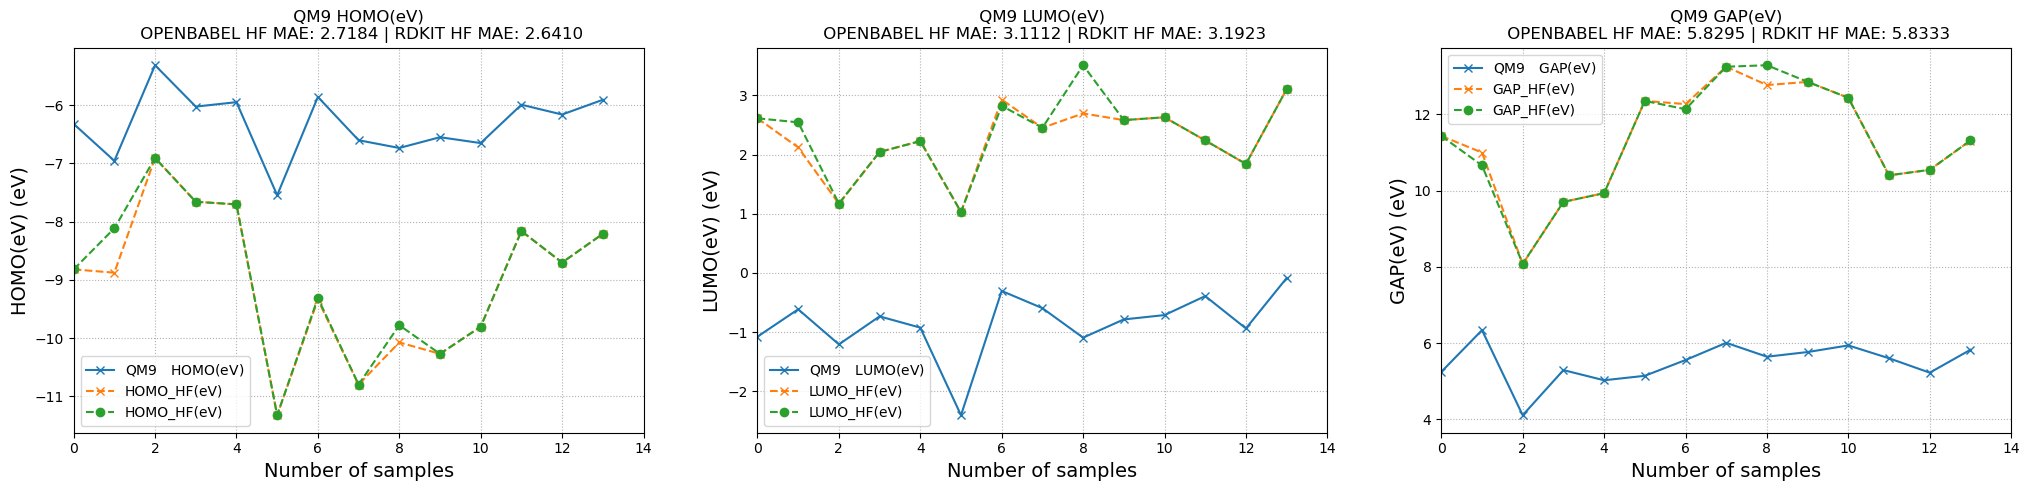

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Supposons que df1 et df2 soient déjà définis
qm9_results = {'HOMO_HF(eV)-MAE': [], 'LUMO_HF(eV)-MAE': [], 'GAP_HF(eV)-MAE': []}

fig, axes = plt.subplots(1, 3, figsize=(25, 5))

actual = ['HOMO(eV)','LUMO(eV)','GAP(eV)']
lot1 = ['HOMO_HF(eV)','LUMO_HF(eV)','GAP_HF(eV)']
lot2 = ['HOMO_HF(eV)','LUMO_HF(eV)','GAP_HF(eV)']
labels = ['HOMO(eV)','LUMO(eV)','GAP(eV)']

for actual_col, lot1_col, lot2_col, label, ax in zip(actual, lot1, lot2, labels, axes):
    
    OB_mae = mean_absolute_error(df[actual_col][:], df[lot1_col][:])
    RDKIT_mae = mean_absolute_error(df[actual_col][:], df1[lot2_col][:])

    qm9_results[lot1_col+'-MAE'].append(OB_mae)
    qm9_results[lot2_col+'-MAE'].append(RDKIT_mae)
    
    # Affichage des résultats avec des points uniques pour chaque MAE
    ax.plot(df[actual_col][:], '-x', label='QM9$\quad$'+label)
    ax.plot(df[lot1_col][:], '--x', label=lot1_col)
    ax.plot(df1[lot2_col][:], '--o', label=lot2_col)
    
    ax.grid(linestyle=':')
    ax.set_xlim([0, len(df1)])
    ax.set_title(" QM9 {} \n OPENBABEL HF MAE: {:.4f} | RDKIT HF MAE: {:.4f}".format(label, OB_mae, RDKIT_mae))
    
    ax.legend(loc='best')
    ax.set_xlabel('Number of samples', fontsize=14)
    ax.set_ylabel('{} (eV)'.format(label), fontsize=14)

qm9_results_df = pd.DataFrame(qm9_results)


plt.show()



------
<font style="font-size:28px;" align="left"><b> <font color="blue"> COMPARAISON 1.1: </font> MAE HF </b></font>
<br>
<a id="task2"></a>
<h3>  </h3>

<u><b>Soit le tabeaux comparatif `openbabel` et `rdkit` </b></u> comportant les `MAE` des energies `GAP HOMO et LUMO` :



$
 \begin{array}{c|c|c|c|} METHODE   & \mathbf{{MAE}_{HF}(HOMO)} & \mathbf{{MAE}_{HF}(LUMO)} & \mathbf{{MAE}_{HF}(GAP)}\\ \hline \mathbf{OPENBABEL} &2.7184 & \textcolor{red}{3.1112}& \textcolor{red}{5.8295} \\  \mathbf{RDKIT} &\textcolor{red}{2.6410} & 3.1923& 5.8333  \end{array}
$

Nous remarquons `openbabel` offre une meilleurs structure `3D` initiale pour le calcul `DFT` que celle avec  `rdkit`.

---

<div style="background-color:#f8d7da; padding: 15px; border-radius: 5px;">
<strong>

# **<u>Conclusion :</u>**

- **Pour les calculs semi-empiriques, il est recommandé d'utiliser `OpenBabel`, en raison de sa bonne précision  dans les valeurs de `MAE`. Cela en fait un outil fiable pour les optimisations des molecules, tout en maintenant une bonne exactitude dans les simulations.**
- **Pour les calculs plus complexes tels que les méthodes DFT ou HF, `OpenBabel` s'avère plus performant. Il offre une meilleure précision dans les géométries et les énergies, ce qui est crucial pour des études nécessitant une grande exactitude.**

</strong>
</div>

---



#  <a id='toc1_1_'></a>[CALIBRATION](#toc0_)


## |<a id='toc1_'></a>[Qu'est-ce que le calibrage en régression linéaire ?](#toc0_)

Le calibrage est un processus qui permet d'ajuster un modèle prédictif afin qu'il produise des prévisions qui soient aussi proches que possible des valeurs réelles. En régression linéaire, cela implique souvent d'ajuster les coefficients du modèle pour minimiser l'erreur entre les prédictions et les valeurs observées.

Formule Mathématique

La régression linéaire peut être exprimée par l'équation suivante :

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$$

où :
- y  est la variable dépendante (valeur à prédire).
- $\beta_0 $ est l'ordonnée à l'origine (intercept).
- $ \beta_1, \beta_2, ..., \beta_n $ sont les coefficients de régression (pentes) pour chaque variable indépendante $ x_1, x_2, ..., x_n $.
- $ \epsilon $ est l'erreur aléatoire.


##  <h1 style="color: #cd7f32;" align="below">  ▎Calibrage du Modèle </h1>


Le calibrage consiste à estimer les coefficients $beta_i$ de manière à minimiser l'erreur entre les valeurs prédites et les valeurs réelles. Cela se fait généralement en utilisant la méthode des moindres carrés, qui cherche à minimiser la somme des carrés des erreurs :

$$
\text{Minimiser} \quad S = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

où :
- $ m$  est le nombre d'observations.
- $y_i$ est la valeur réelle.
- $hat{y}_i$ est la valeur prédite par le modèle.


In [82]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import sys
from tqdm import tqdm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import linear_model


In [83]:
dataAll=df

In [85]:
r2_homo_xtb = r2_score(dataAll['HOMO_DFT(eV)'], dataAll['HOMO_xtb(eV)'])
r2_homo_dft = r2_score(dataAll['HOMO(eV)'], dataAll['HOMO_DFT(eV)'])
MAE_homo_xtb = mean_absolute_error(dataAll['HOMO_DFT(eV)'], dataAll['LUMO_xtb(eV)'])
MAE_homo_dft = mean_absolute_error(dataAll['HOMO(eV)'], dataAll['LUMO_DFT(eV)'])
r2_lumo_xtb = r2_score(dataAll['LUMO_DFT(eV)'], dataAll['LUMO_xtb(eV)'])
r2_lumo_dft = r2_score(dataAll['LUMO(eV)'], dataAll['LUMO_DFT(eV)'])
MAE_lumo_xtb = mean_absolute_error(dataAll['LUMO_DFT(eV)'], dataAll['LUMO_xtb(eV)'])
MAE_lumo_dft = mean_absolute_error(dataAll['LUMO(eV)'], dataAll['LUMO_DFT(eV)'])
r2_gap_xtb = r2_score(dataAll['GAP_DFT(eV)'], dataAll['GAP_xtb(eV)'])
r2_gap_dft = r2_score(dataAll['GAP(eV)'], dataAll['GAP_DFT(eV)'])
MAE_gap_xtb = mean_absolute_error(dataAll['GAP(eV)'], dataAll['GAP_xtb(eV)'])
MAE_gap_dft = mean_absolute_error(dataAll['GAP(eV)'], dataAll['GAP_DFT(eV)'])

print('ENERGY homo')
print(r2_homo_xtb, r2_homo_dft)
print(MAE_homo_xtb, MAE_homo_dft)
print('ENERGY lumo')
print(r2_lumo_xtb,r2_lumo_dft)
print(MAE_lumo_xtb, MAE_lumo_dft)
print('ENERGY gap')
print(r2_gap_xtb, r2_gap_dft)
print(MAE_gap_xtb,MAE_gap_dft)

ENERGY homo
-5.1004593453573115 -0.7557044660315133
1.7133111782904138 4.547125527462856
ENERGY lumo
-50.98512672415178 -2.6815535682264704
3.693623915838721 0.9332476169651434
ENERGY gap
-7.861017296514554 -8.308681106065572
3.2286868202161427 1.4222394639433114


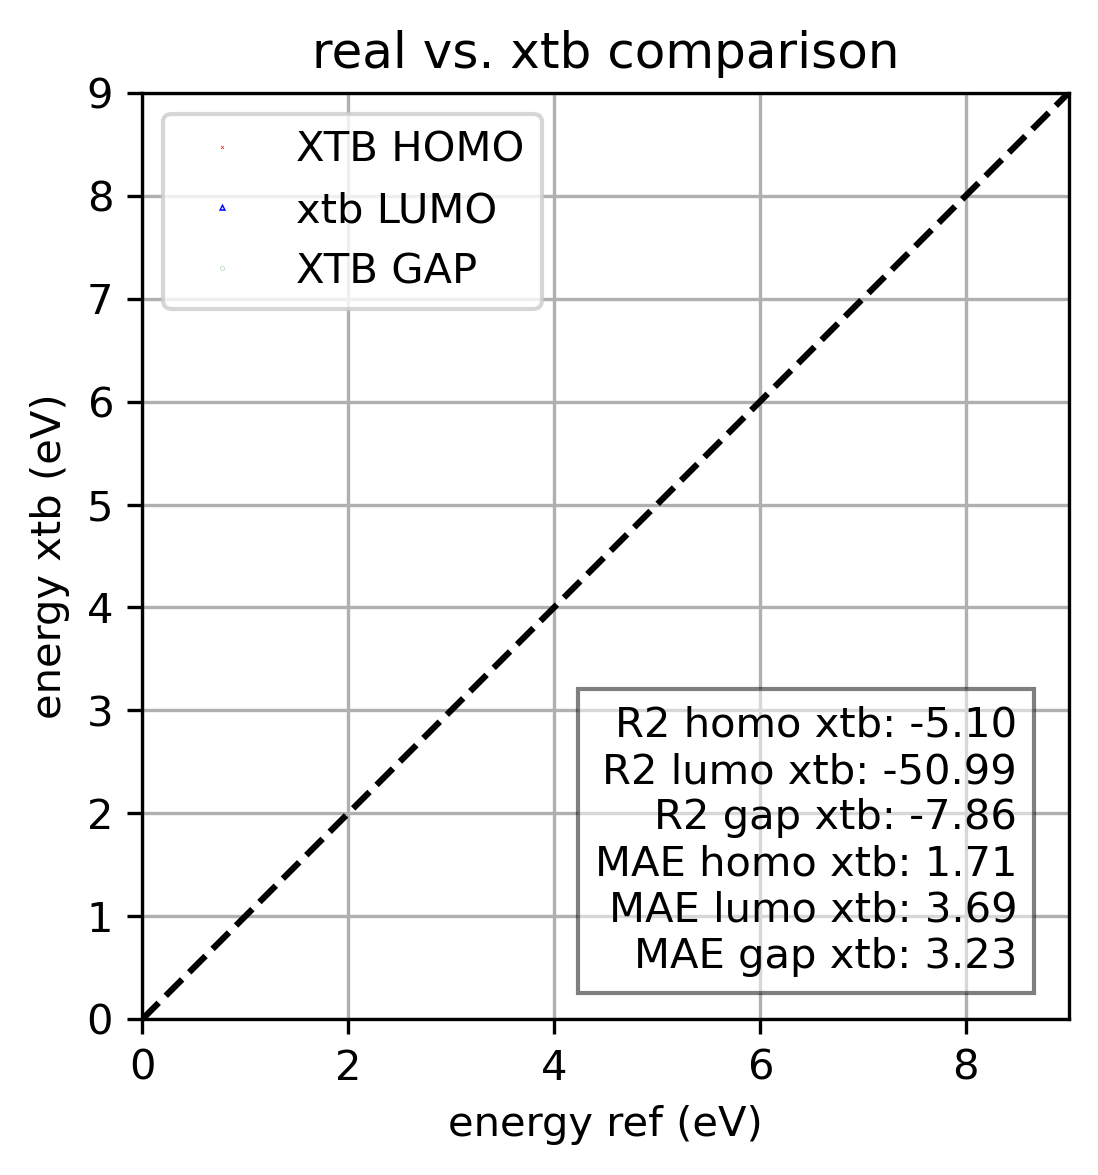

In [87]:
fig = plt.figure(num=1, figsize=[7, 4], dpi=300, clear=True)
ax = fig.add_subplot(1, 2, 1)
ax.set_axisbelow(True)

plt.plot(dataAll['HOMO_DFT(eV)'], dataAll['HOMO_xtb(eV)'], 'x', color='red', markersize=0.1, label='XTB HOMO')
plt.plot(dataAll['HOMO(eV)'], dataAll['HOMO_DFT(eV)'], '^', color='blue', markersize=0.1, label='xtb LUMO')
plt.plot(dataAll['HOMO(eV)'], dataAll['HOMO_DFT(eV)'], '.', color='green', markersize=0.1, label='XTB GAP')

x = np.linspace(0, 9, 100)
plt.plot(x, x, 'k--')
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('energy ref (eV)')
plt.ylabel('energy xtb (eV)')
plt.title('real vs. xtb comparison')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.annotate('R2 homo xtb: %0.2f\n' % r2_homo_xtb +
                 'R2 lumo xtb: %0.2f\n' % r2_lumo_xtb +
                 'R2 gap xtb: %0.2f\n' % r2_gap_xtb +
                 'MAE homo xtb: %0.2f\n' % MAE_homo_xtb +
                 'MAE lumo xtb: %0.2f\n' % MAE_lumo_xtb +
                 'MAE gap xtb: %0.2f' % MAE_gap_xtb,
                 (8.5, 0.5),
                 bbox=dict(facecolor='white', alpha=0.5),
                 ha='right')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()

/tmp/ipykernel_15907/2488953908.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')
/tmp/ipykernel_15907/2488953908.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


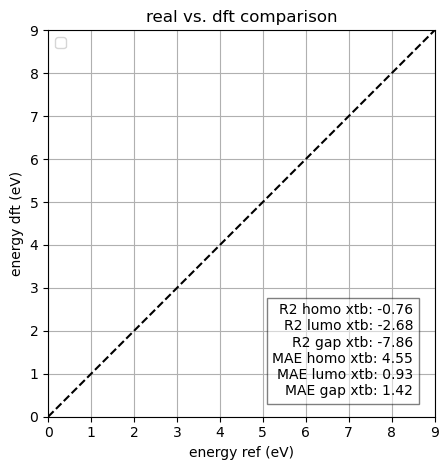

In [88]:
ax = fig.add_subplot(1, 2, 2)
ax.set_axisbelow(True)

plt.plot(x, x, 'k--')
plt.grid(True)
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.xlabel('energy ref (eV)')
plt.ylabel('energy dft (eV)')
plt.title('real vs. dft comparison')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.annotate('R2 homo xtb: %0.2f\n' % r2_homo_dft +
                 'R2 lumo xtb: %0.2f\n' % r2_lumo_dft +
                 'R2 gap xtb: %0.2f\n' % r2_gap_xtb +
                 'MAE homo xtb: %0.2f\n' % MAE_homo_dft +
                 'MAE lumo xtb: %0.2f\n' % MAE_lumo_dft +
                 'MAE gap xtb: %0.2f' % MAE_gap_dft,
                 (8.5, 0.5),
                 bbox=dict(facecolor='white', alpha=0.5),
                 ha='right')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig('mopssam_calib_nrg_' + '.png')





In [89]:
regr = linear_model.LinearRegression()
regr.fit(np.array(dataAll['HOMO_xtb(eV)']).reshape(-1, 1), np.array(dataAll['HOMO(eV)']).reshape(-1, 1))
dataAll['xTB_Lin'] = [x[0] for x in regr.predict(np.array(dataAll['HOMO_xtb(eV)']).reshape(-1, 1))]
regr = linear_model.LinearRegression()
regr.fit(np.array(dataAll['HOMO_DFT(eV)']).reshape(-1, 1), np.array(dataAll['HOMO(eV)']).reshape(-1, 1))
dataAll['DFT_Lin'] = [x[0] for x in regr.predict(np.array(dataAll['HOMO_DFT(eV)']).reshape(-1, 1))]
# dataAll.info()
dataAll.to_csv('all_data_' + '.csv', index=False)
dataAll

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time,xTB_Lin,DFT_Lin
0,gdb 4380,OC1=CN=CC(O)=N1,-6.323926,-7.3872,-8.821139,-6.337653,-1.077571,-6.2732,2.613395,-1.214202,...,0.666778,0.000966,0.669849,0.546041,22.026873,0.430283,134.432223,0.001166,-6.192806,-6.584865
1,gdb 14590,O=CNC=NCC#C,-6.957951,-7.7873,-8.877091,-5.255156,-0.614977,-5.4648,2.121473,-2.150999,...,1.702408,0.025521,0.425527,0.940878,23.041233,0.422350,193.906636,0.001833,-6.388564,-6.028070
2,gdb 22022,NC1=CC(C=NO1)=NO,-5.317105,-8.0969,-6.908038,-3.795975,-1.208186,-6.3398,1.169309,-2.180662,...,0.098498,0.024695,0.395967,1.400363,33.107385,0.599040,364.000784,0.001186,-6.540042,-5.277525
3,gdb 24412,C1OC=NC2=C1OC=N2,-6.027322,-8.0902,-7.660670,-5.449417,-0.734707,-6.8477,2.044010,-1.879592,...,0.002541,0.001388,0.346774,0.700061,23.931516,0.391980,269.191491,0.006325,-6.536764,-6.127991
4,gdb 29313,CC1=C(OC=C1N)C#N,-5.951130,-7.1936,-7.705140,-5.374674,-0.925187,-5.6062,2.228067,-1.243358,...,0.799195,0.036617,0.481716,0.726604,37.841400,1.321705,364.237818,0.008307,-6.098084,-6.089546
5,gdb 42275,O=C(C#N)C1CC2OC12,-7.548438,-9.0785,-11.323786,-7.470215,-2.405487,-6.6082,1.029461,-3.093480,...,0.013359,0.003932,3.580392,1.326396,48.624266,0.617672,370.638800,0.001349,-7.020310,-7.167411
6,gdb 43049,O=C1C2CN3C2CCC13,-5.861333,-7.0659,-9.341106,-5.615523,-0.304768,-1.5964,2.929026,-1.607115,...,0.004007,0.003960,7.489861,2.145267,48.044566,2.010584,491.450329,0.002252,-6.035604,-6.213429
7,gdb 45561,O=C1CC2COCC2C1,-6.604203,-7.5445,-10.796833,-6.603563,-0.595929,0.0961,2.452577,-1.958521,...,0.441885,0.002815,3.407747,2.278172,51.941771,1.032744,404.625456,0.006109,-6.269769,-6.721639
8,gdb 51841,O=CCC1COCC1=O,-6.737539,-7.8121,-10.074305,-5.846232,-1.093898,-7.5038,2.695154,-1.769761,...,1.385046,0.007255,2.262770,1.453515,39.036975,0.827146,372.398437,0.002722,-6.400698,-6.332097
9,gdb 68005,OC12CC(=O)C3OC1C23,-6.552502,-7.5416,-10.270240,-6.414115,-0.786409,-3.3874,2.582490,-1.906543,...,0.238246,0.010475,2.900485,0.725147,33.984899,0.640131,416.866951,0.001039,-6.268350,-6.624194


##  <a id='toc1_1_'></a>[Comparaison des Méthodes](#toc0_)




In [90]:
import pandas as pd
from scipy.stats import pearsonr
import hvplot.pandas  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


In [91]:
df1


,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_conf(A),rmsd1_conf(A),rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time
0,gdb 4380,OC1=CN=CC(O)=N1,-6.323926,-7.3872,-8.821188,-6.337653,-1.077571,-6.2732,2.613285,-1.214299,...,0.497735,0.498489,0.442851,0.001093,0.007378,0.464814,18.873589,0.349503,108.931516,0.005626
1,gdb 14590,O=CNC=NCC#C,-6.957951,-7.5316,-8.115376,-4.519007,-0.614977,-5.4118,2.545011,-1.791970,...,1.289066,1.338304,0.045885,0.061532,0.014500,1.810822,22.262102,0.528628,196.236482,0.002488
2,gdb 22022,NC1=CC(C=NO1)=NO,-5.317105,-8.0963,-6.909303,-3.798654,-1.208186,-6.3397,1.171171,-2.179201,...,0.544414,0.528906,0.021675,0.021134,0.008974,0.834605,21.292153,0.492116,284.936671,0.000946
3,gdb 24412,C1OC=NC2=C1OC=N2,-6.027322,-8.0897,-7.660270,-5.449145,-0.734707,-6.8477,2.044460,-1.879299,...,0.252794,0.252549,0.001285,0.001203,0.007274,0.582878,22.364269,0.596792,252.108833,0.001007
4,gdb 29313,CC1=C(OC=C1N)C#N,-5.951130,-7.1937,-7.705081,-5.374673,-0.925187,-5.6065,2.228064,-1.243396,...,0.641023,0.647788,0.773498,0.033059,0.029809,0.957825,26.611199,0.571771,261.670560,0.001268
5,gdb 42275,O=C(C#N)C1CC2OC12,-7.548438,-9.0785,-11.323476,-7.469861,-2.405487,-6.6082,1.029521,-3.093560,...,0.724063,0.724673,0.007033,0.003434,0.012762,0.853618,28.356463,0.387690,278.242789,0.000952
6,gdb 43049,O=C1C2CN3C2CCC13,-5.861333,-7.1732,-9.312434,-5.645659,-0.304768,-1.5784,2.823399,-1.706127,...,0.236633,0.237682,0.289282,0.002061,0.020392,1.686964,37.155186,1.228569,426.602921,0.000738
7,gdb 45561,O=C1CC2COCC2C1,-6.604203,-7.5445,-10.797117,-6.603687,-0.595929,0.0956,2.452416,-1.958620,...,0.356095,0.356145,0.015030,0.002978,0.015748,2.364390,48.184232,1.084134,360.798448,0.008858
8,gdb 51841,O=CCC1COCC1=O,-6.737539,-7.5263,-9.779054,-5.446853,-1.093898,-7.1244,3.510330,-1.135114,...,0.944106,0.928694,0.500299,0.024112,0.030051,2.339990,39.069960,0.981671,378.494300,0.002568
9,gdb 68005,OC12CC(=O)C3OC1C23,-6.552502,-7.5417,-10.270597,-6.414374,-0.786409,-3.3874,2.582461,-1.906570,...,0.371658,0.367696,0.238343,0.011976,0.009700,1.360296,34.817528,0.811707,357.414132,0.001341


# <a id='toc1_'></a>[ GRAPHES  DE COMPARAISONS  DES RMSD](#toc0_)

## <a id='toc1_'></a>[Qu'est-ce que RMSD(Root Mean Square Deviation) ?](#toc0_)


### L' écart quadratique moyen (RMSD) de deux structures est une mesure de la distance moyenne entre les atomes de deux structures superposées comme exemples  les coordonnées xyz de deux molécules. L'équation de base pour calculer le RMSD est la suivante :

$$ 
\mathtt{RMSD} = \sqrt{\frac{\sum_{i}^{N}{(O_i - P_i)}^2}{N}}
$$

où \( P_i \) et \( Q_i \) sont les coordonnées des points correspondants dans les ensembles \( P \) et \( Q \), et \( N \) est le nombre total de points.

Q exemples d'interprétation des valeurs de RMSD :

- RMSD faible (< 0.5 Å) : les deux molécules sont très similaires, avec des différences mineures.
- RMSD moyen (0.5-1.5 Å) : les deux molécules ont des différences notables, mais conservent une structure globale similaire.
- RMSD élevé (1.5-3 Å) : les deux molécules ont des différences importantes, avec des changements significatifs dans la structure.
- RMSD très élevé (> 3 Å) : les deux molécules sont très différentes, avec des structures quasi distinctes.

Cependant, il est important de noter que l'interprétation du RMSD dépend du contexte et de la nature des données. Il est recommandé de consulter des experts dans le domaine pour obtenir une interprétation précise et pertinente
**MAE** : Le MAE est plus minimal avec OpenBabel qu'avec RDKit.


##  <a id='toc1_1_'></a>[COMPARAISON DES RMSD](#toc0_)
<hr>
<ul>
    <li><a href="#rdkit1">RMSD RDKT-OPENBABEL PRE-OPT CONF ET OPT:XTB</a></li>
    <li><a href="#openbabel">RMSD RDKT-OPENBABEL PRE-OPT CONF ET OPT:DFT</a></li>
    <li><a href="#pyscf1">RMSD RDKT-OPENBABEL PRE-OPT CONF ET OPT:HF</a></li>


</ul>
<hr>

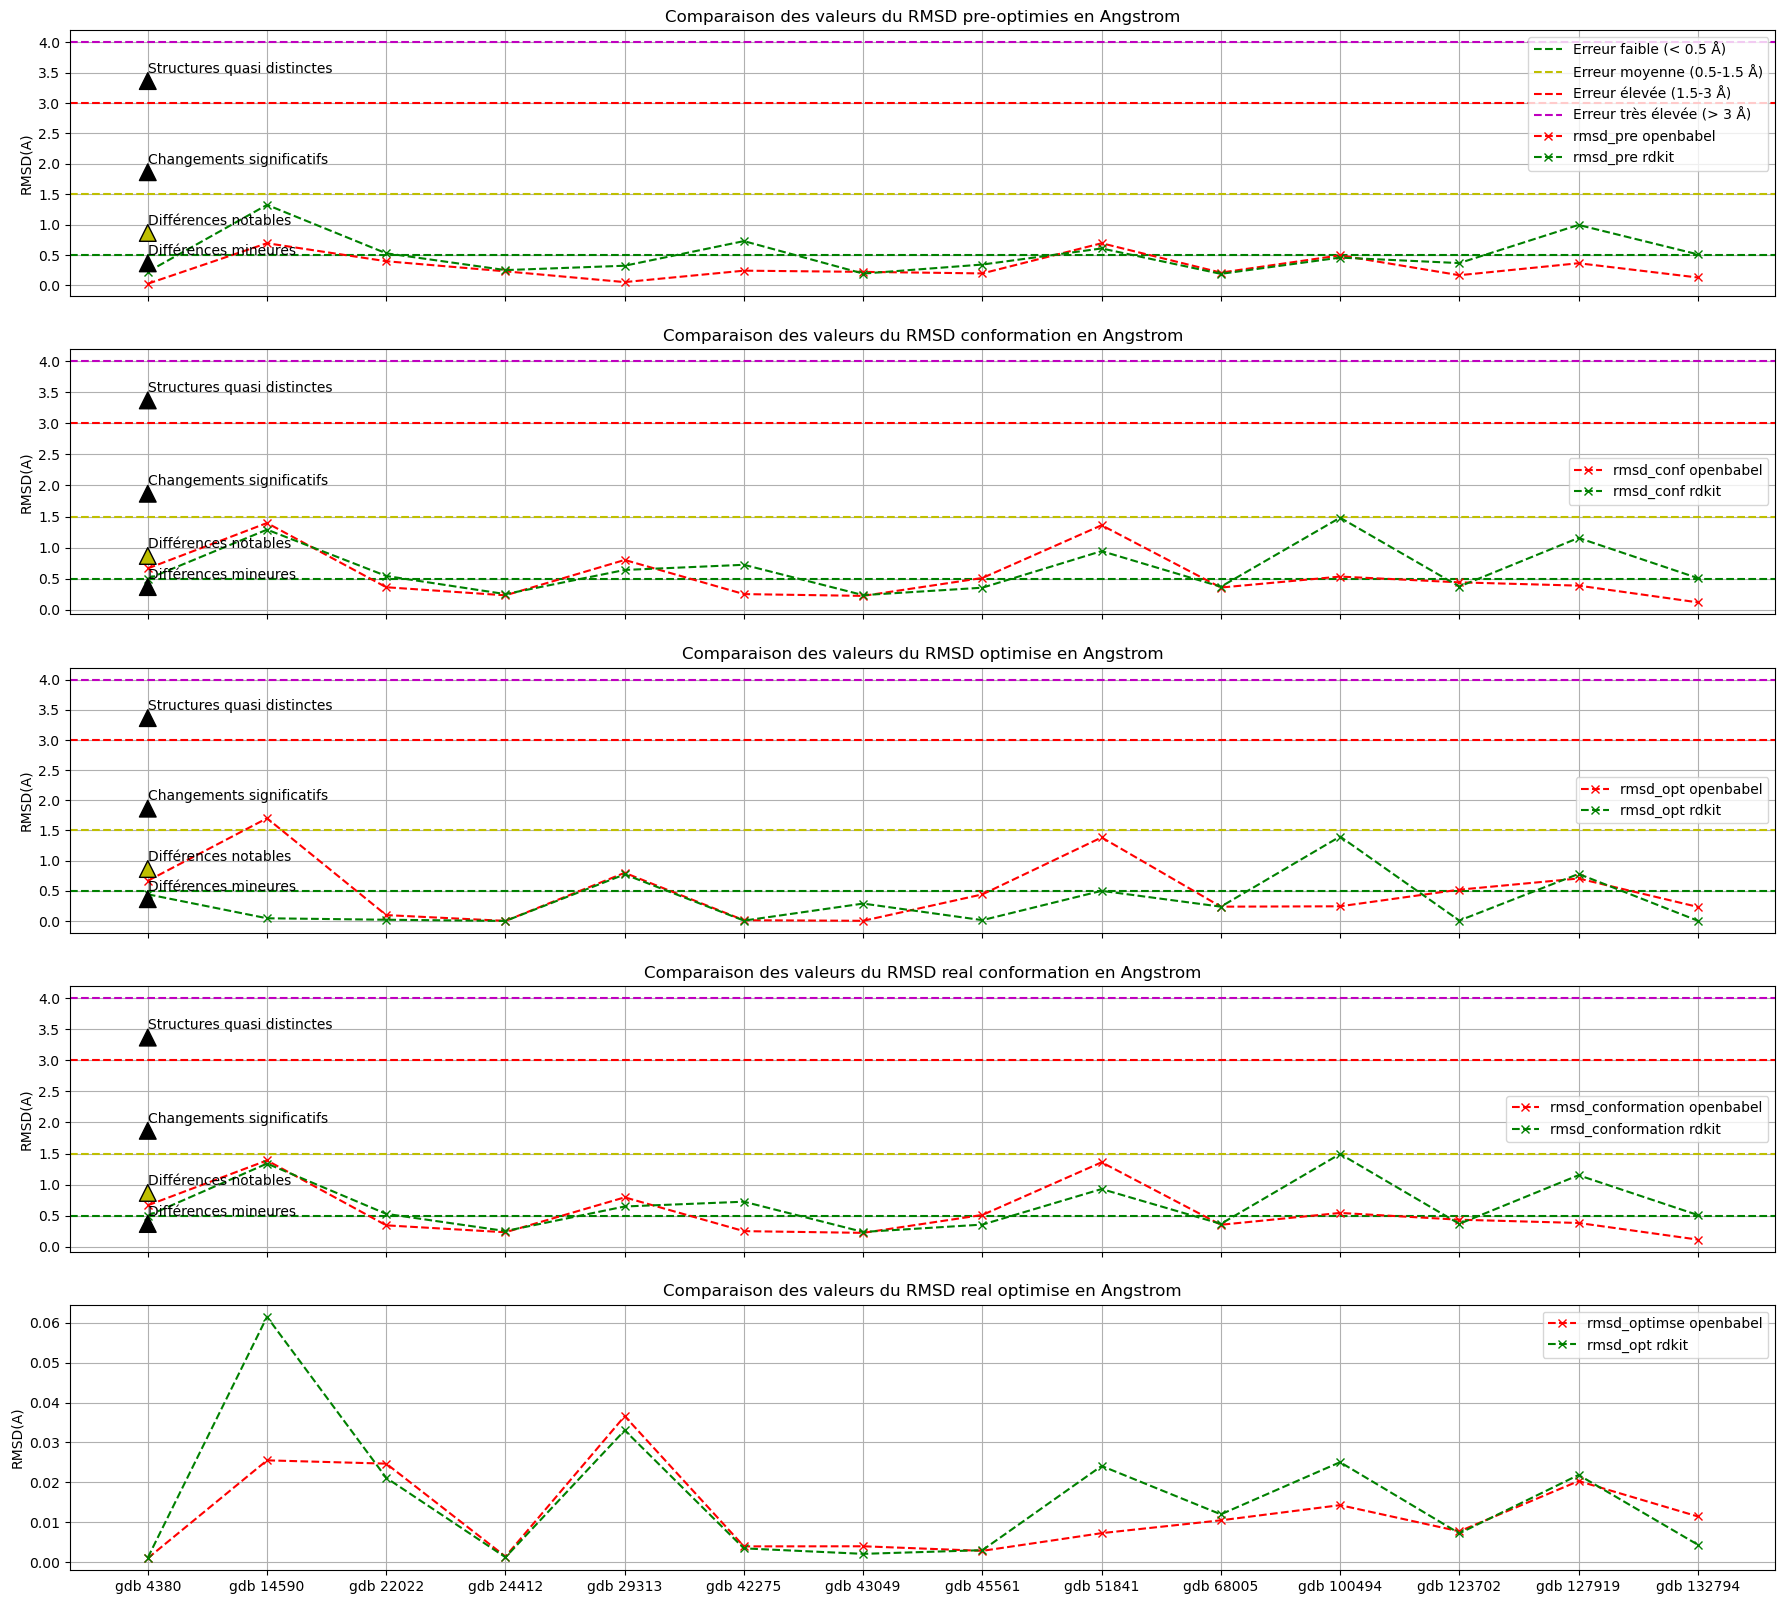

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que df1, df5, df51 soient déjà chargés comme DataFrame pandas
# df1 = pd.read_csv('path_to_csv1')
# df5 = pd.read_csv('path_to_csv2')
# df51 = pd.read_csv('path_to_csv3')

fig, ax = plt.subplots(5, 1, figsize=(22, 20), sharex=True)

# Tracer les lignes horizontales pour délimiter les niveaux d'erreur
levels = [
    (0.5, 'g', 'Erreur faible (< 0.5 Å)'),
    (1.5, 'y', 'Erreur moyenne (0.5-1.5 Å)'),
    (3, 'r', 'Erreur élevée (1.5-3 Å)'),
    (4, 'm', 'Erreur très élevée (> 3 Å)')
]

for i in range(4):
    for level, color, label in levels:
        ax[i].axhline(y=level, color=color, linestyle='--', label=label if i == 0 else "")
    
    # Ajouter des annotations pour expliquer les niveaux d'erreur
    ax[i].annotate('Différences mineures', xy=(0, 0.5), xytext=(0, 0.5), arrowprops=dict(facecolor='k'))
    ax[i].annotate('Différences notables', xy=(0, 1), xytext=(0, 1), arrowprops=dict(facecolor='y'))
    ax[i].annotate('Changements significatifs', xy=(0, 2), xytext=(0, 2), arrowprops=dict(facecolor='k'))
    ax[i].annotate('Structures quasi distinctes', xy=(0, 3.5), xytext=(0, 3.5), arrowprops=dict(facecolor='k'))

# Tracer les graphiques pour chaque sous-plot
ax[0].plot(df1['smiles_key'], df['rmsd_pre(A)'], marker='x', label='rmsd_pre openbabel', linestyle='--', color='red')
ax[0].plot(df1['smiles_key'], df1['rmsd_pre(A)'], marker='x', label='rmsd_pre rdkit', linestyle='--', color='green')
ax[0].set_ylabel('RMSD(A)')
ax[0].set_title('Comparaison des valeurs du RMSD pre-optimies en Angstrom')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(df1['smiles_key'], df['rmsd_conf(A)'], marker='x', label='rmsd_conf openbabel', linestyle='--', color='red')
ax[1].plot(df1['smiles_key'], df1['rmsd_conf(A)'], marker='x', label='rmsd_conf rdkit', linestyle='--', color='green')
ax[1].set_ylabel('RMSD(A)')
ax[1].set_title('Comparaison des valeurs du RMSD conformation en Angstrom')
ax[1].grid(True)
ax[1].legend()

ax[2].plot(df1['smiles_key'], df['rmsd_opt(A)'], marker='x', label='rmsd_opt openbabel', linestyle='--', color='red')
ax[2].plot(df1['smiles_key'], df1['rmsd_opt(A)'], marker='x', label='rmsd_opt rdkit', linestyle='--', color='green')
ax[2].set_ylabel('RMSD(A)')
ax[2].set_title('Comparaison des valeurs du RMSD optimise en Angstrom')
ax[2].grid(True)
ax[2].legend()

ax[3].plot(df1['smiles_key'], df['rmsd1_conf(A)'], marker='x', label='rmsd_conformation openbabel', linestyle='--', color='red')
ax[3].plot(df1['smiles_key'], df1['rmsd1_conf(A)'], marker='x', label='rmsd_conformation rdkit', linestyle='--', color='green')
ax[3].set_ylabel('RMSD(A)')
ax[3].set_title('Comparaison des valeurs du RMSD real conformation en Angstrom')
ax[3].grid(True)
ax[3].legend()

ax[4].plot(df1['smiles_key'], df['rmsd1_opt(A)'], marker='x', label='rmsd_optimse openbabel', linestyle='--', color='red')
ax[4].plot(df1['smiles_key'], df1['rmsd1_opt(A)'], marker='x', label='rmsd_opt rdkit', linestyle='--', color='green')
ax[4].set_ylabel('RMSD(A)')
ax[4].set_title('Comparaison des valeurs du RMSD real optimise en Angstrom')
ax[4].grid(True)
ax[4].legend()

plt.show()

---

## **<font color="blue">COMPARAISON 2 :</font> RMSD**

---

<div style="background-color:#f8d7da; padding: 15px; border-radius: 5px;">
<strong>

### **<u>Conclusion :</u>**

- **En analysant les courbes des valeurs `RMSD`, il apparaît clairement que les structures générées par `OpenBabel` présentent un `RMSD` plus faible par rapport à celles générées par `RDKit`. Cela suggère que les coordonnées `3D` issues d'`OpenBabel` sont généralement plus proches des configurations optimales, entraînant une meilleure concordance entre les structures calculées et les références optimisées.**
- **Cette réduction du `RMSD` avec `OpenBabel` est indicative d'une meilleure fidélité dans la pré-optimisation des géométries moléculaires, ce qui en fait un choix potentiellement plus robuste pour des études nécessitant une grande précision structurelle.**

</strong>
</div>

---

# <a id='toc1_'></a>[ GRAPHES  DE COMPARAISONS  ENTRE  RDKIT ET OPENBABEL ](#toc0_)
 

## <a id='toc1_'></a>[COMPARAISON DU TEMPS DE CALCULS](#toc0_)
##  <a id='toc1_1_'></a>[COMPARAISON DES RMSD](#toc0_)
<hr>
<ul>
    <li><a href="#rdkit1">TEMPS DE SIMULATION RDKT-OPENBABEL PRE-OPT CONF ET OPT:XTB</a></li>
    <li><a href="#openbabel">TEMPS DE SIMULATION RDKT-OPENBABEL PRE-OPT CONF ET OPT:DFT</a></li>
    <li><a href="#pyscf1">TEMPS DE SIMULATION  RDKT-OPENBABEL PRE-OPT CONF ET OPT:HF</a></li>


</ul>
<hr>

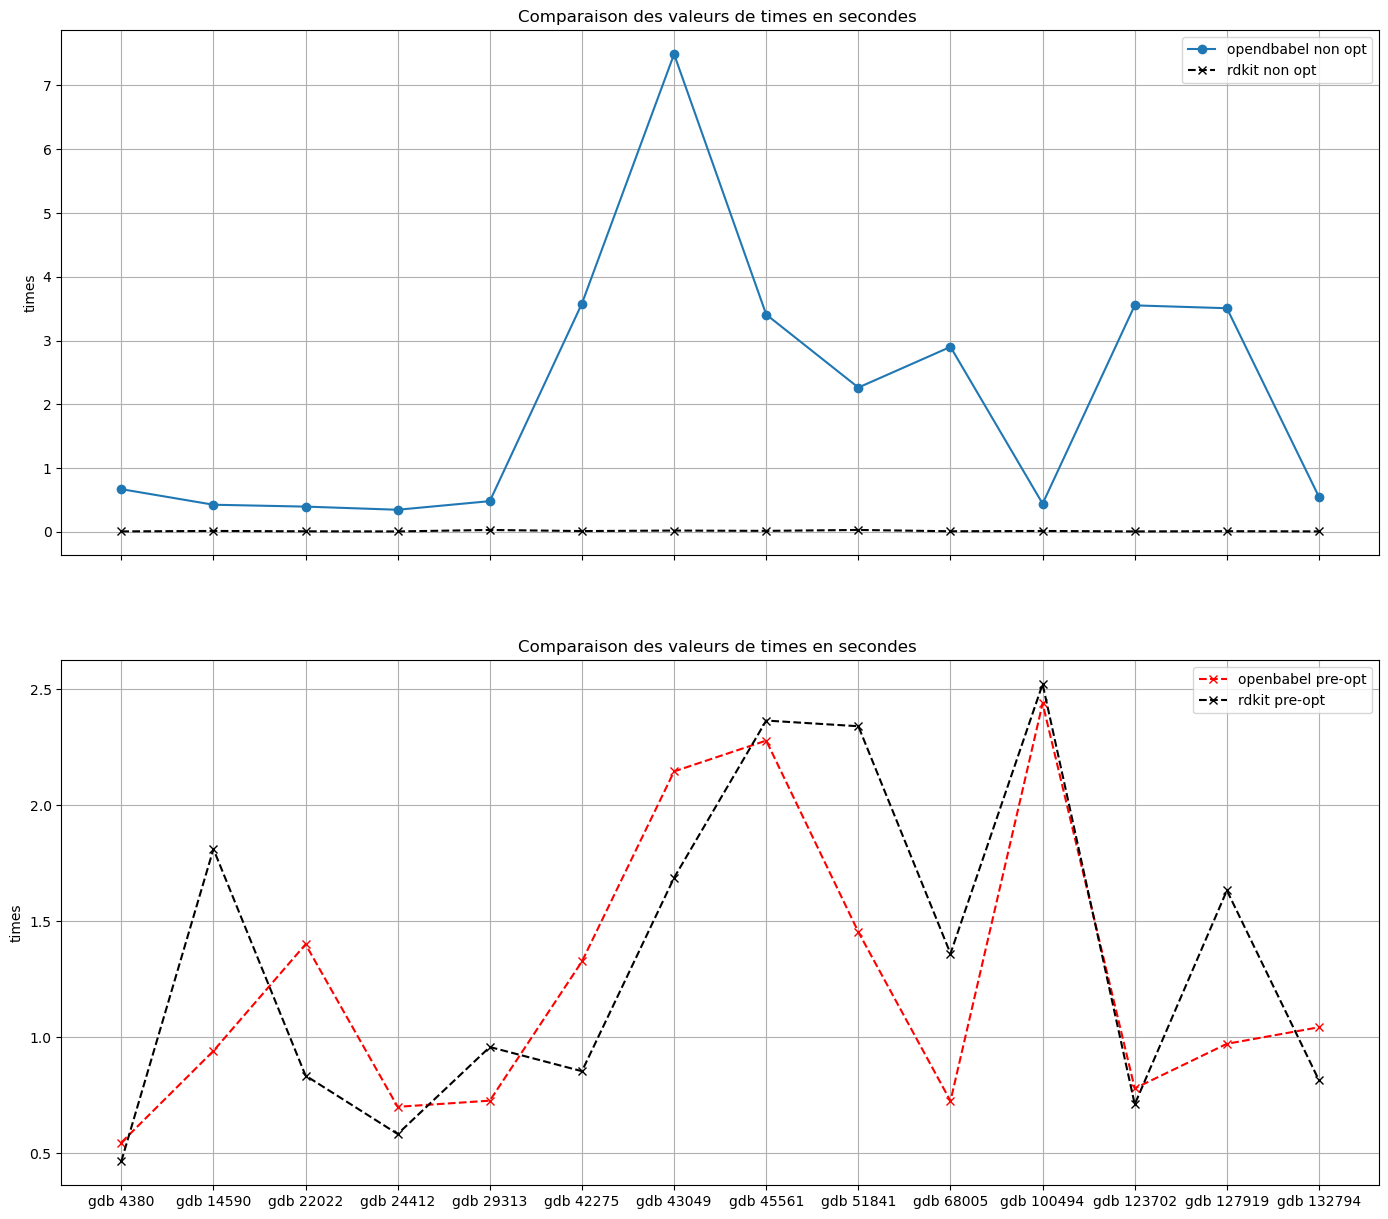

In [93]:
fig, ax = plt.subplots(2, 1, figsize=(17, 15), sharex=True)

# GAP Comparaison

ax[0].plot(df1['smiles_key'], df['rdkit_time'], marker='o', label='opendbabel non opt')
ax[0].plot(df1['smiles_key'], df1['rdkit_time'], marker='x', label='rdkit non opt', linestyle='--', color='black')

ax[1].plot(df1['smiles_key'], df['xtb_time'], marker='x', label='openbabel pre-opt', linestyle='--', color='red')
ax[1].plot(df1['smiles_key'], df1['xtb_time'], marker='x', label='rdkit pre-opt', linestyle='--', color='black')
ax[0].set_ylabel('times')
ax[0].set_title('Comparaison des valeurs de times en secondes ')
ax[0].grid(True)
ax[0].legend()
ax[1].set_ylabel('times')
ax[1].set_title('Comparaison des valeurs de times en secondes ')
ax[1].grid(True)
ax[1].legend()

---

## **<font color="blue">COMPARAISON 3.1</font>** : **Temps computationnels**

---

<div style="background-color:#f8d7da; padding: 15px; border-radius: 5px;">
<strong>

### **<u>Conclusion :</u>**

- **Openbabel prend plus de temps pour générer les coordonnées 3D initiales que rdkit.**
- **Le temps de pré-optimisation, cependant, reste comparable.**

</strong>
</div>

---


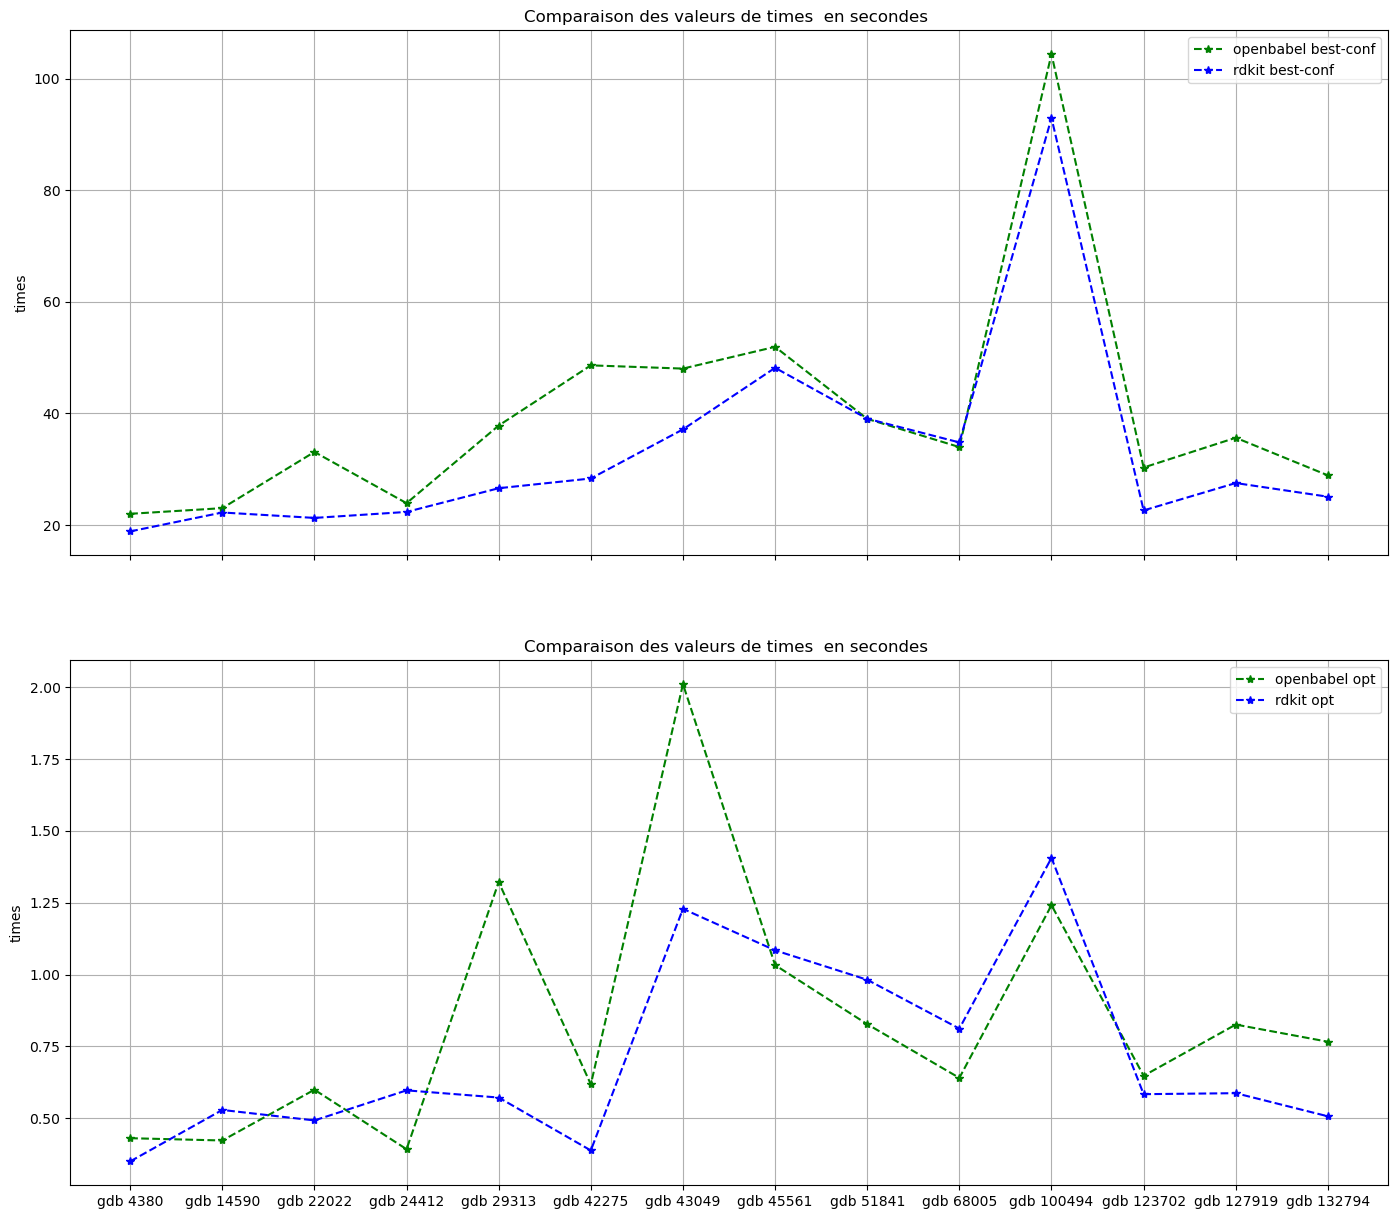

In [94]:
fig, ax = plt.subplots(2, 1, figsize=(17, 15), sharex=True)

# GAP Comparaison


ax[0].plot(df1['smiles_key'], df['crest_time'], marker='*', label='openbabel best-conf', linestyle='--', color='green')
ax[0].plot(df1['smiles_key'], df1['crest_time'], marker='*', label='rdkit best-conf', linestyle='--', color='blue')
ax[1].plot(df1['smiles_key'], df['xtb_opt_time'], marker='*', label='openbabel opt', linestyle='--', color='green')
ax[1].plot(df1['smiles_key'], df1['xtb_opt_time'], marker='*', label='rdkit opt', linestyle='--', color='blue')
ax[0].set_ylabel('times')
ax[0].set_title('Comparaison des valeurs de times  en secondes ')
ax[0].grid(True)
ax[0].legend()
ax[1].set_ylabel('times')
ax[1].set_title('Comparaison des valeurs de times  en secondes ')
ax[1].grid(True)
ax[1].legend()

In [95]:
df

,smiles_key,SMILES,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),...,rmsd_opt(A),rmsd1_opt(A),rdkit_time,xtb_time,crest_time,xtb_opt_time,dft_time,xtb_cal_time,xTB_Lin,DFT_Lin
0,gdb 4380,OC1=CN=CC(O)=N1,-6.323926,-7.3872,-8.821139,-6.337653,-1.077571,-6.2732,2.613395,-1.214202,...,0.666778,0.000966,0.669849,0.546041,22.026873,0.430283,134.432223,0.001166,-6.192806,-6.584865
1,gdb 14590,O=CNC=NCC#C,-6.957951,-7.7873,-8.877091,-5.255156,-0.614977,-5.4648,2.121473,-2.150999,...,1.702408,0.025521,0.425527,0.940878,23.041233,0.422350,193.906636,0.001833,-6.388564,-6.028070
2,gdb 22022,NC1=CC(C=NO1)=NO,-5.317105,-8.0969,-6.908038,-3.795975,-1.208186,-6.3398,1.169309,-2.180662,...,0.098498,0.024695,0.395967,1.400363,33.107385,0.599040,364.000784,0.001186,-6.540042,-5.277525
3,gdb 24412,C1OC=NC2=C1OC=N2,-6.027322,-8.0902,-7.660670,-5.449417,-0.734707,-6.8477,2.044010,-1.879592,...,0.002541,0.001388,0.346774,0.700061,23.931516,0.391980,269.191491,0.006325,-6.536764,-6.127991
4,gdb 29313,CC1=C(OC=C1N)C#N,-5.951130,-7.1936,-7.705140,-5.374674,-0.925187,-5.6062,2.228067,-1.243358,...,0.799195,0.036617,0.481716,0.726604,37.841400,1.321705,364.237818,0.008307,-6.098084,-6.089546
5,gdb 42275,O=C(C#N)C1CC2OC12,-7.548438,-9.0785,-11.323786,-7.470215,-2.405487,-6.6082,1.029461,-3.093480,...,0.013359,0.003932,3.580392,1.326396,48.624266,0.617672,370.638800,0.001349,-7.020310,-7.167411
6,gdb 43049,O=C1C2CN3C2CCC13,-5.861333,-7.0659,-9.341106,-5.615523,-0.304768,-1.5964,2.929026,-1.607115,...,0.004007,0.003960,7.489861,2.145267,48.044566,2.010584,491.450329,0.002252,-6.035604,-6.213429
7,gdb 45561,O=C1CC2COCC2C1,-6.604203,-7.5445,-10.796833,-6.603563,-0.595929,0.0961,2.452577,-1.958521,...,0.441885,0.002815,3.407747,2.278172,51.941771,1.032744,404.625456,0.006109,-6.269769,-6.721639
8,gdb 51841,O=CCC1COCC1=O,-6.737539,-7.8121,-10.074305,-5.846232,-1.093898,-7.5038,2.695154,-1.769761,...,1.385046,0.007255,2.262770,1.453515,39.036975,0.827146,372.398437,0.002722,-6.400698,-6.332097
9,gdb 68005,OC12CC(=O)C3OC1C23,-6.552502,-7.5416,-10.270240,-6.414115,-0.786409,-3.3874,2.582490,-1.906543,...,0.238246,0.010475,2.900485,0.725147,33.984899,0.640131,416.866951,0.001039,-6.268350,-6.624194


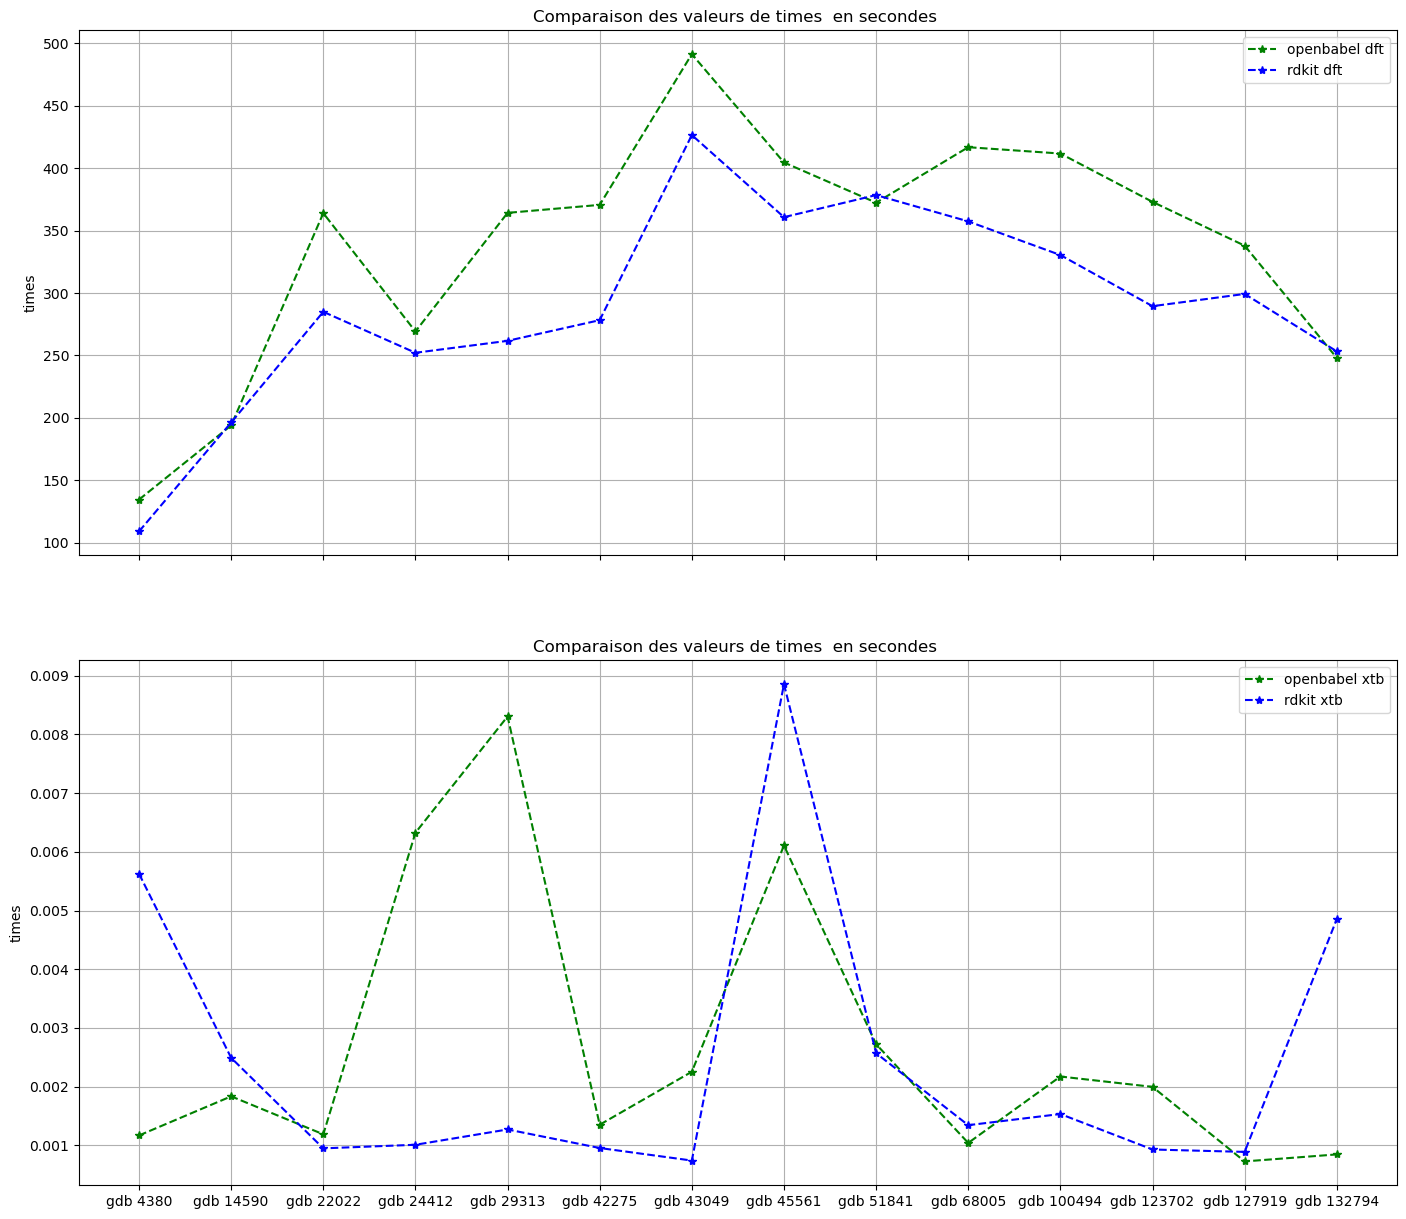

In [96]:
fig, ax = plt.subplots(2, 1, figsize=(17, 15), sharex=True)

# GAP Comparaison
ax[0].plot(df1['smiles_key'], df['dft_time'], marker='*', label='openbabel dft', linestyle='--', color='green')
ax[0].plot(df1['smiles_key'], df1['dft_time'], marker='*', label='rdkit dft', linestyle='--', color='blue')

ax[0].set_ylabel('times')
ax[0].set_title('Comparaison des valeurs de times  en secondes ')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(df1['smiles_key'], df['xtb_cal_time'], marker='*', label='openbabel xtb', linestyle='--', color='green')
ax[1].plot(df1['smiles_key'], df1['xtb_cal_time'], marker='*', label='rdkit xtb', linestyle='--', color='blue')

ax[1].set_ylabel('times')
ax[1].set_title('Comparaison des valeurs de times  en secondes ')
ax[1].grid(True)
ax[1].legend()

---

## **<font color="blue">COMPARAISON 3.2</font>** : **Temps computationnels**

---

<div style="background-color:#f8d7da; padding: 15px; border-radius: 5px;">
<strong>

### **<u>Conclusion :</u>**

- **Le temps de recherche des conformères et d'optimisation des structures avec les coordonnées `3D` générées par `Openbabel et Rdkit` reste comparable.**

</strong>
</div>

--- 


## <a id='toc1_'></a>[ COMPARAISON DU TEMPS DE SIMULATION ET ENERGIES  RDKT-OPENBABEL](#toc0_)
 

<hr>
<ul>
    <li><a href="#rdkit1">TEMPS DE SIMULATION ET ENERGIES  RDKT-OPENBABEL :XTB</a></li>
    <li><a href="#openbabel">TEMPS DE SIMULATION ET ENERGIES  RDKT-OPENBABEL:DFT</a></li>
    <li><a href="#pyscf1">TEMPS DE SIMULATION ET ENERGIES  RDKT-OPENBABEL:HF</a></li>


</ul>
<hr>

### <a id='toc1_'></a>[ TEMPS DE SIMULATION ET ENERGIES  RDKT-OPENBABEL :XTB](#toc0_)

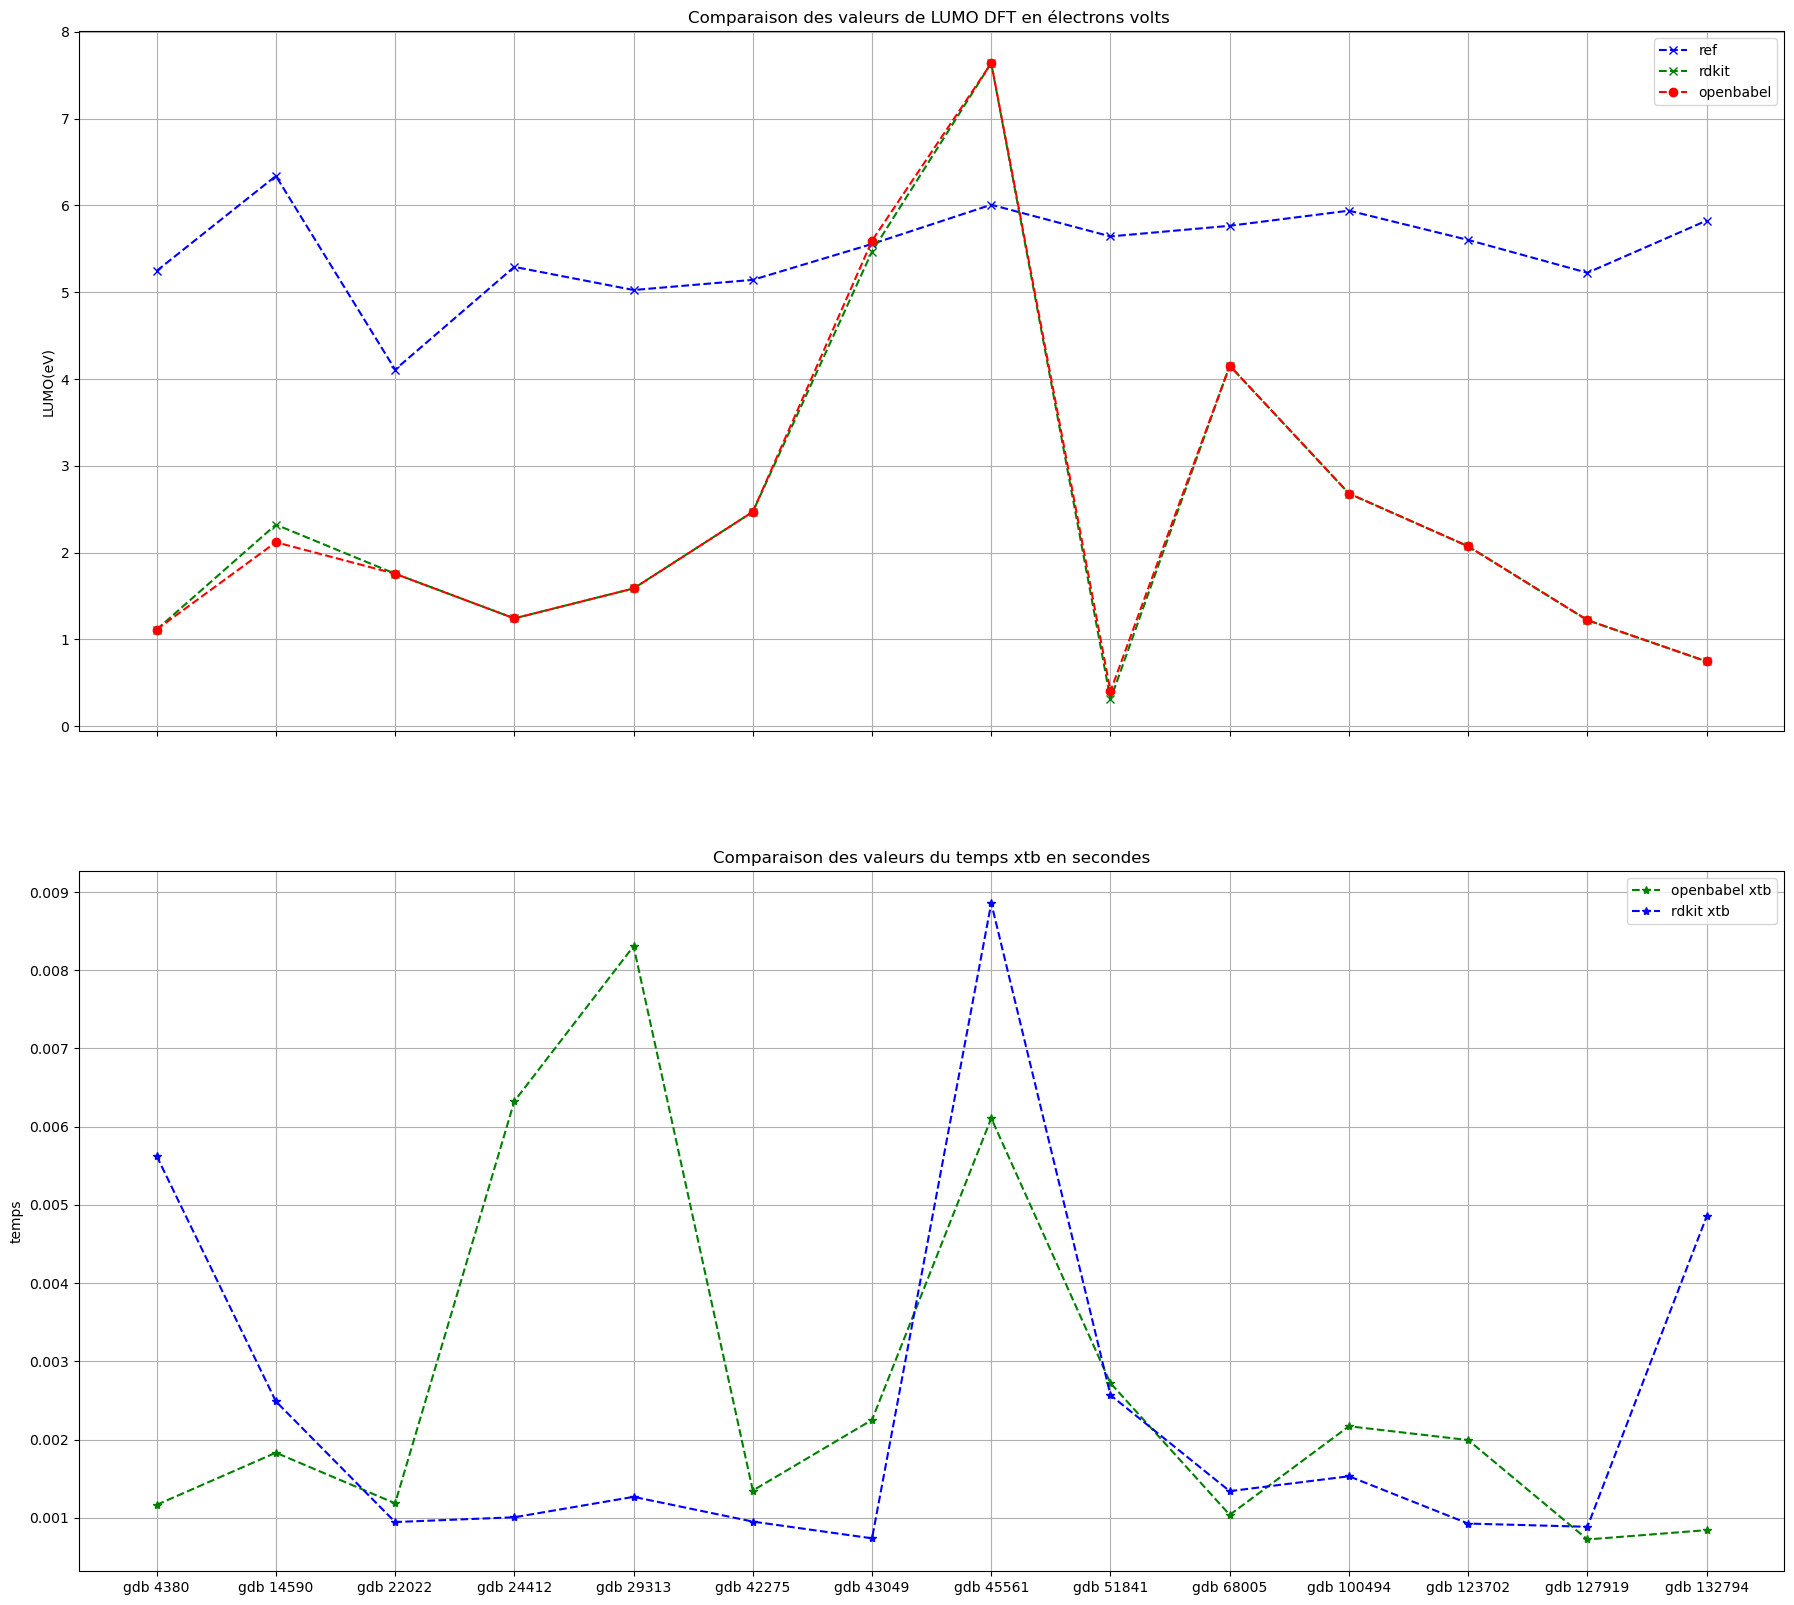

In [97]:
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)

# GAP Comparaison
ax[0].plot(df1['smiles_key'], df['GAP(eV)'], marker='x', label='ref', linestyle='--', color='blue')
ax[0].plot(df1['smiles_key'], df['GAP_xtb(eV)'], marker='x', label='rdkit', linestyle='--', color='green')
ax[0].plot(df1['smiles_key'], df1['GAP_xtb(eV)'], marker='o', label='openbabel',linestyle='--', color='red')

ax[0].set_ylabel('LUMO(eV)')
ax[0].set_title('Comparaison des valeurs de LUMO DFT en électrons volts ')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(df1['smiles_key'], df['xtb_cal_time'], marker='*', label='openbabel xtb', linestyle='--', color='green')
ax[1].plot(df1['smiles_key'], df1['xtb_cal_time'], marker='*', label='rdkit xtb', linestyle='--', color='blue')
ax[1].set_ylabel('temps')
ax[1].set_title('Comparaison des valeurs du temps xtb en secondes')
ax[1].grid(True)
ax[1].legend()

---

## **<font color="blue">COMPARAISON 3.3</font>** : **Temps computationnels**

---

<div style="background-color:#f8d7da; padding: 15px; border-radius: 5px;">
<strong>

### **<u>Conclusion :</u>**

- **Le processus avec `rdkit` prend un peu plus de temps que le processus avec `openbabel`.**

</strong>
</div>

---


### <a id='toc1_'></a>[ TEMPS DE SIMULATION ET ENERGIES LUMO  RDKT-OPENBABEL :XTB-DFT](#toc0_)

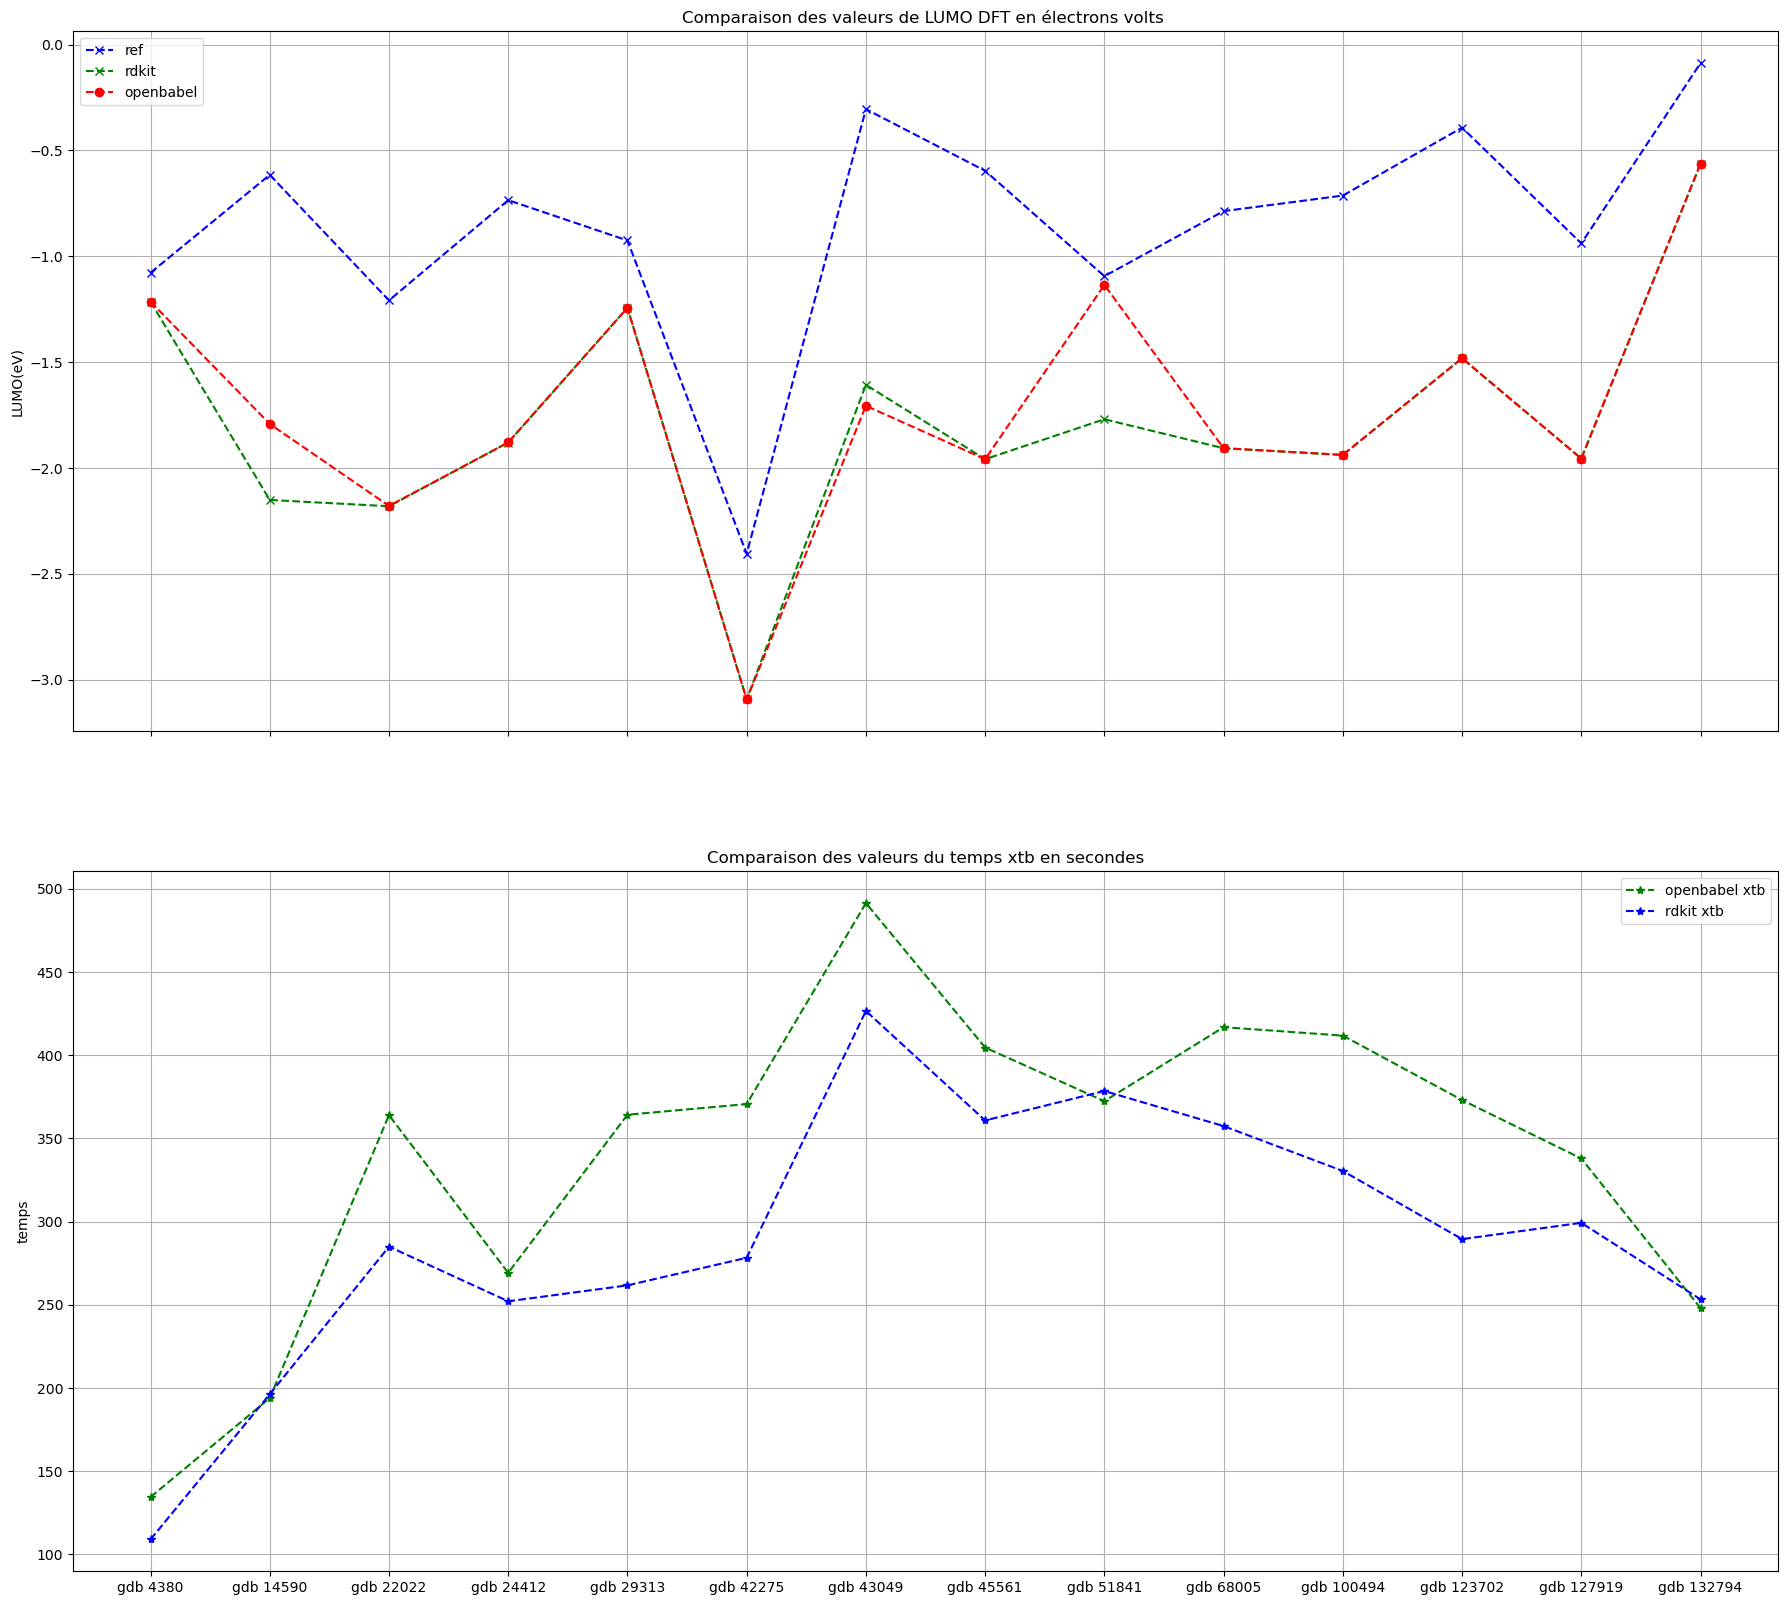

In [98]:
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)

# GAP Comparaison
ax[0].plot(df1['smiles_key'], df['LUMO(eV)'], marker='x', label='ref', linestyle='--', color='blue')
ax[0].plot(df1['smiles_key'], df['LUMO_DFT(eV)'], marker='x', label='rdkit', linestyle='--', color='green')
ax[0].plot(df1['smiles_key'], df1['LUMO_HF(eV)'], marker='o', label='openbabel',linestyle='--', color='red')

ax[0].set_ylabel('LUMO(eV)')
ax[0].set_title('Comparaison des valeurs de LUMO DFT en électrons volts ')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(df1['smiles_key'], df['dft_time'], marker='*', label='openbabel xtb', linestyle='--', color='green')
ax[1].plot(df1['smiles_key'], df1['dft_time'], marker='*', label='rdkit xtb', linestyle='--', color='blue')
ax[1].set_ylabel('temps')
ax[1].set_title('Comparaison des valeurs du temps xtb en secondes')
ax[1].grid(True)
ax[1].legend()

### <a id='toc1_'></a>[ TEMPS DE SIMULATION ET ENERGIES GAP  RDKT-OPENBABEL :XTB-DFT-GAP](#toc0_)

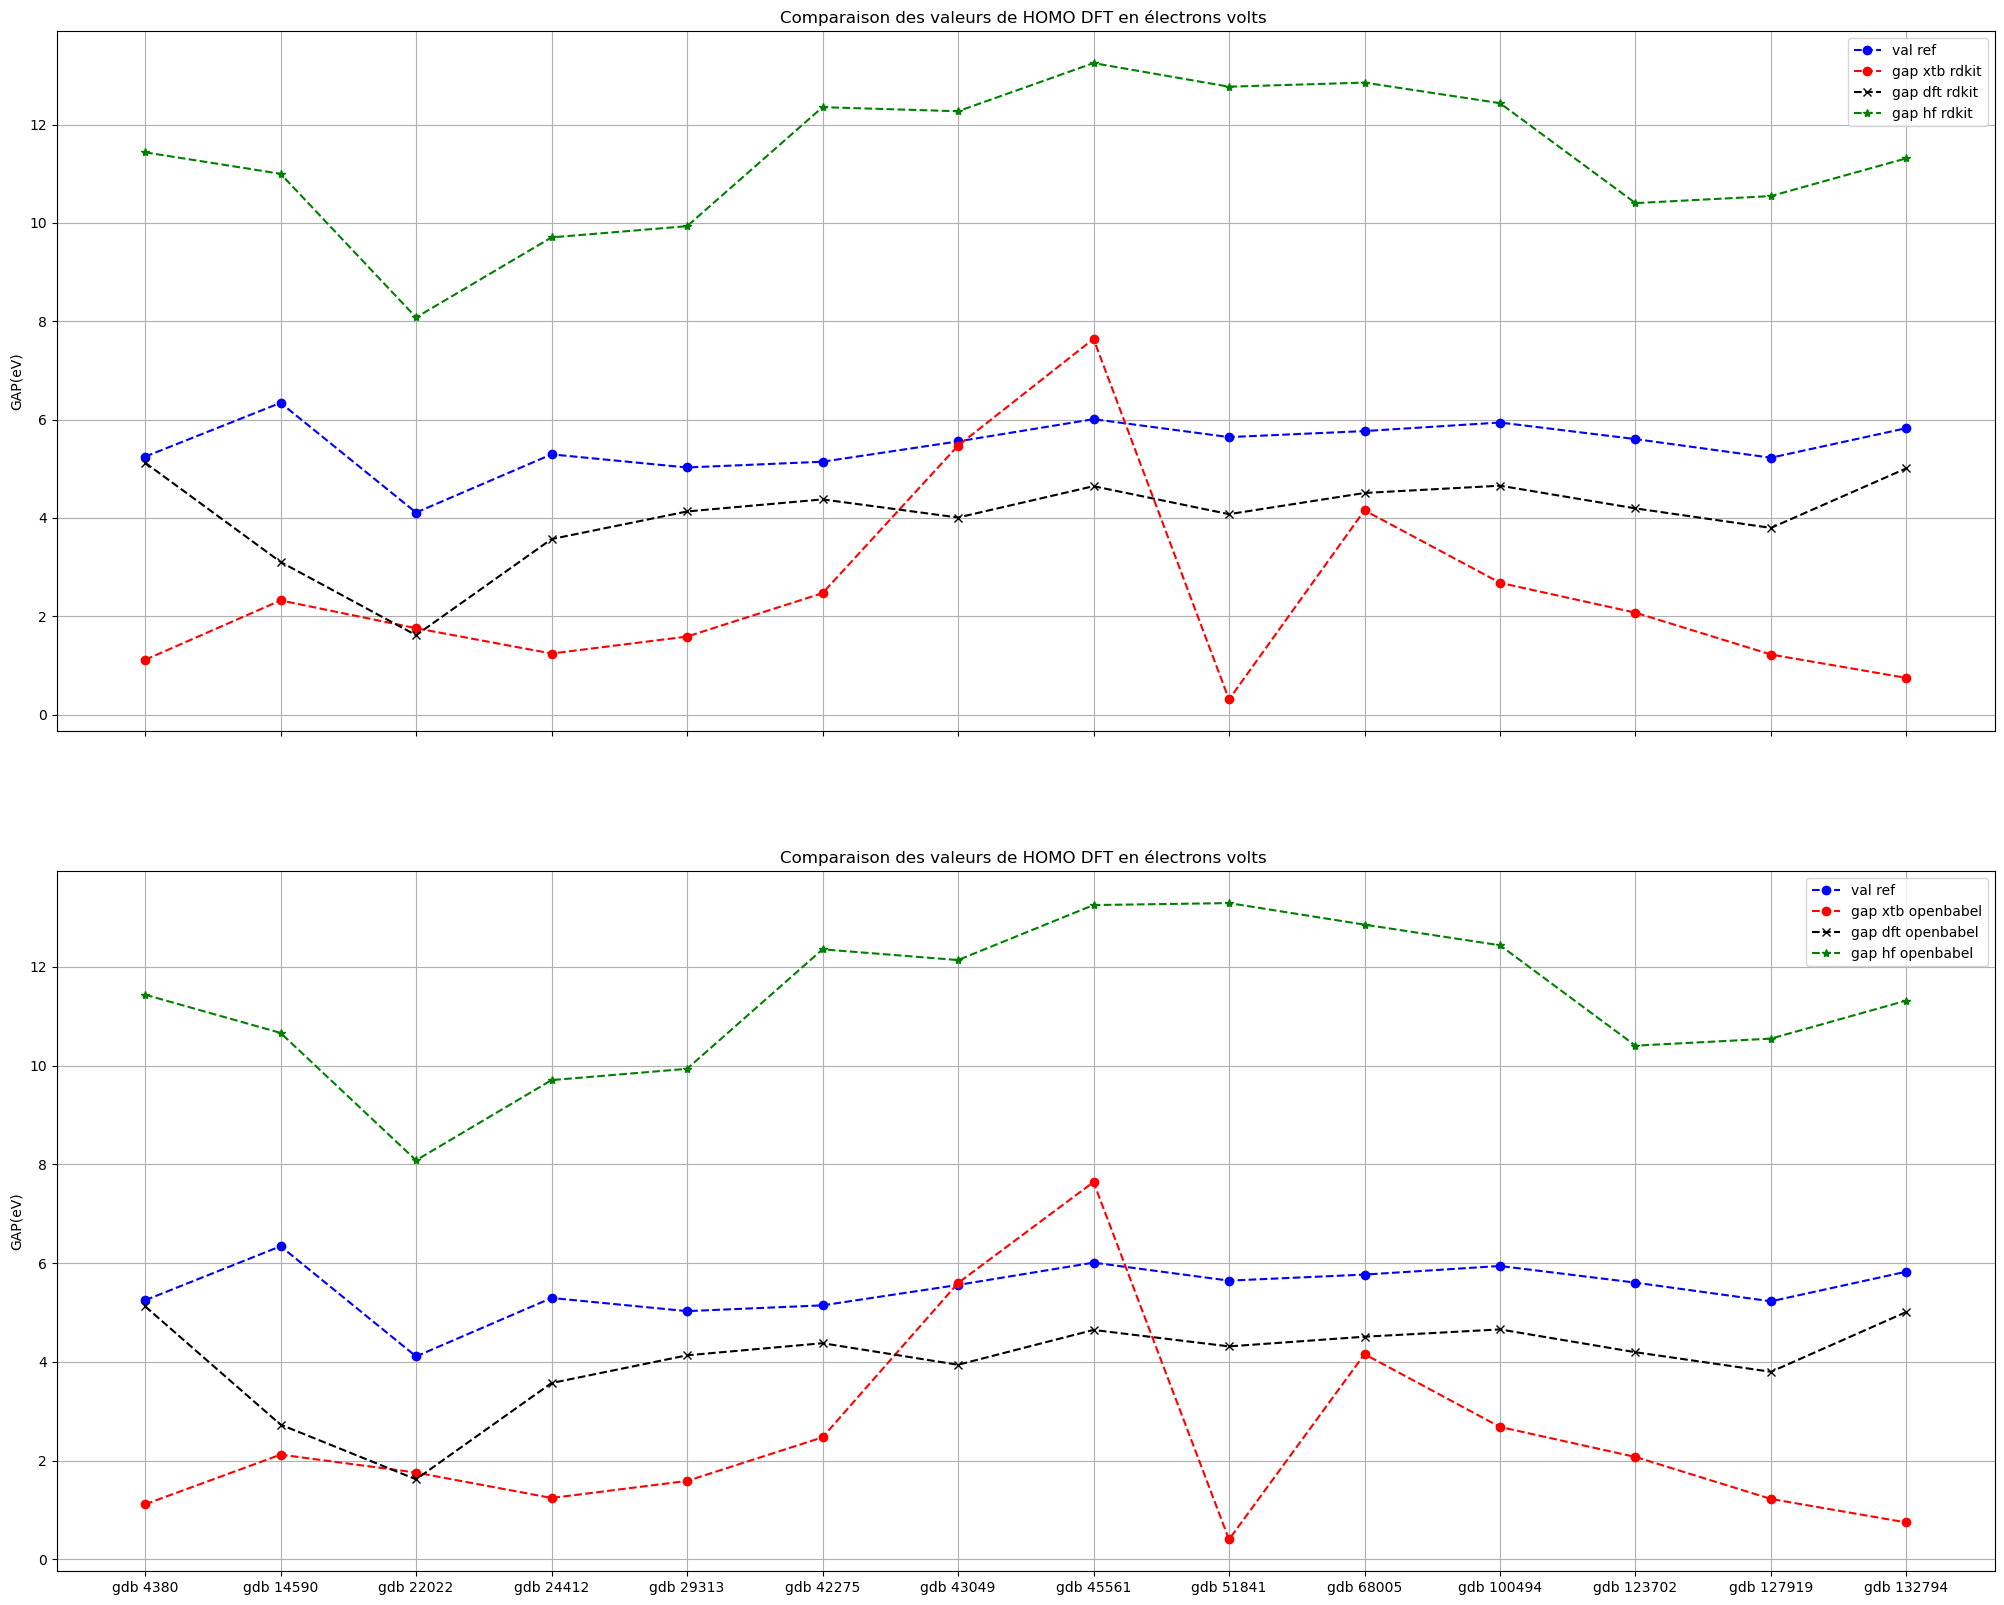

In [100]:

fig, ax = plt.subplots(2, 1, figsize=(25, 20), sharex=True)

# GAP Comparaison
ax[0].plot(df1['smiles_key'], df['GAP(eV)'], marker='o', label='val ref', linestyle='--', color='blue')
ax[0].plot(df1['smiles_key'], df['GAP_xtb(eV)'], marker='o', label='gap xtb rdkit',linestyle='--', color='red')
ax[0].plot(df1['smiles_key'], df['GAP_DFT(eV)'], marker='x', label='gap dft rdkit', linestyle='--', color='black')
ax[0].plot(df1['smiles_key'], df['GAP_HF(eV)'], marker='*', label='gap hf rdkit', linestyle='--', color='green')
ax[0].set_ylabel('GAP(eV)')
ax[0].set_title('Comparaison des valeurs de HOMO DFT en électrons volts ')
ax[0].grid(True)
ax[0].legend()
# GAP Comparaison
ax[1].plot(df1['smiles_key'], df1['GAP(eV)'], marker='o', label='val ref', linestyle='--', color='blue')
ax[1].plot(df1['smiles_key'], df1['GAP_xtb(eV)'], marker='o', label='gap xtb openbabel',linestyle='--', color='red')
ax[1].plot(df1['smiles_key'], df1['GAP_DFT(eV)'], marker='x', label='gap dft openbabel', linestyle='--', color='black')
ax[1].plot(df1['smiles_key'], df1['GAP_HF(eV)'], marker='*', label='gap hf openbabel', linestyle='--', color='green')
ax[1].set_ylabel('GAP(eV)')
ax[1].set_title('Comparaison des valeurs de HOMO DFT en électrons volts ')
ax[1].grid(True)
ax[1].legend()

---

## **<font color="blue">COMPARAISON 3.4</font>** : **Temps computationnels**

---

<div style="background-color:#f8d7da; padding: 15px; border-radius: 5px;">
<strong>

### **<u>Conclusion :</u>**

- **Les valeurs des énergies `HOMO, LUMO et GAP` et temps computationnels  sont comparables.**

</strong>
</div>

---



# <a id='toc1_'></a>[COMPARAISON 2:](#toc0_)

## le valeurs  des énergies HOMO LUMO ET GAP sont comparables 

# <a id='toc1_'></a>[COMPARAISON DES ENERGIES TOTALES ET TEMPS DE AIMULATION XTB](#toc0_)
<hr>
<ul>
    <li><a href="#rdkit1">COMPARAISON DES ENERGIES TOTALES ET TEMPS DE AIMULATION XTB:eV</a></li>
    <li><a href="#openbabel">COMPARAISON DES ENERGIES TOTALES ET TEMPS DE AIMULATION XTB:EN Kcal/mol</a></li>



</ul>
<hr>

# <a id='toc1_'></a>[COMPARAISON DES ENERGIES TOTALES ET TEMPS DE AIMULATION XTB:eV](#toc0_)

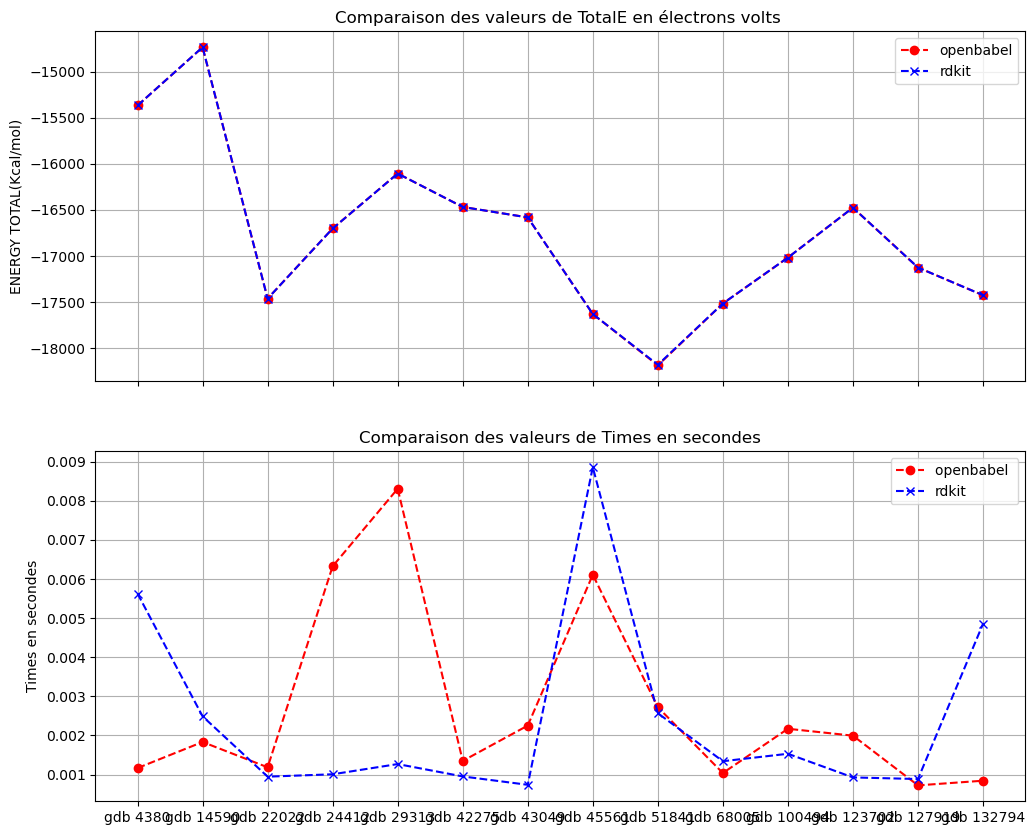

In [101]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# GAP Comparaison

ax[0].plot(df1['smiles_key'], df['ToT Energie(eV)'], marker='o', label='openbabel', linestyle='--', color='red')
ax[0].plot(df1['smiles_key'], df1['ToT Energie(eV)'], marker='x', label='rdkit', linestyle='--', color='blue')

ax[0].set_ylabel('ENERGY TOTAL(Kcal/mol)')
ax[0].set_title('Comparaison des valeurs de TotalE en électrons volts ')

ax[1].plot(df1['smiles_key'], df['xtb_cal_time'], marker='o', label='openbabel ', linestyle='--', color='red')
ax[1].plot(df1['smiles_key'], df1['xtb_cal_time'], marker='x', label='rdkit', linestyle='--', color='blue')

ax[1].set_ylabel('Times en secondes')
ax[1].set_title('Comparaison des valeurs de Times en secondes')
ax[1].grid(True)

ax[0].grid(True)
ax[0].legend()
ax[1].legend()

# <a id='toc1_'></a>[COMPARAISON DES ENERGIES TOTALES ET TEMPS DE AIMULATION XTB:Kcal/mol](#toc0_)

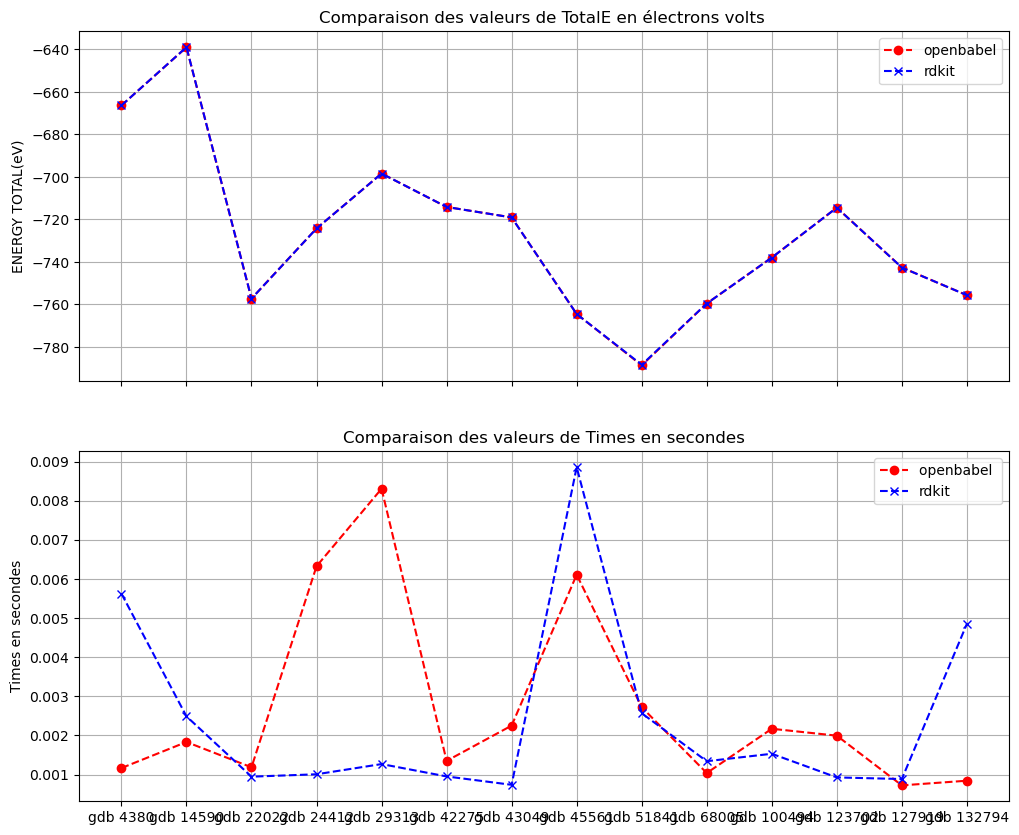

In [102]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# GAP Comparaison

ax[0].plot(df1['smiles_key'], df['ToT Energie(Kcal/mol)'], marker='o', label='openbabel', linestyle='--', color='red')
ax[0].plot(df1['smiles_key'], df1['ToT Energie(Kcal/mol)'], marker='x', label='rdkit', linestyle='--', color='blue')

ax[0].set_ylabel('ENERGY TOTAL(eV)')
ax[0].set_title('Comparaison des valeurs de TotalE en électrons volts ')

ax[1].plot(df1['smiles_key'], df['xtb_cal_time'], marker='o', label='openbabel ', linestyle='--', color='red')
ax[1].plot(df1['smiles_key'], df1['xtb_cal_time'], marker='x', label='rdkit', linestyle='--', color='blue')

ax[1].set_ylabel('Times en secondes')
ax[1].set_title('Comparaison des valeurs de Times en secondes')
ax[1].grid(True)

ax[0].grid(True)
ax[0].legend()
ax[1].legend()

---

## **<font color="blue">COMPARAISON 4.3</font>** : **Temps computationnels**

---

<div style="background-color:#f8d7da; padding: 15px; border-radius: 5px;">
<strong>

### **<u>Conclusion :</u>**

- **Nous observons que les énergies totales sont comparables entre `Openbabel` et `RDKit`. Cependant, le temps de simulation reste nettement en faveur de `Openbabel`.**

</strong>
</div>

---





## **Analyse**
|
Critère | Observation |
| :---- | :---------- |
| **MAE** | Le MAE varie selon les méthodes `openbabel` et `rdkit`. Pour les calculs de chimie computationnelle à faible coût, `openbabel` montre de meilleures performances avec des méthodes `DFT` et `HF`, en raison de sa capacité à fournir des résultats plus précis pour les énergies frontalières. Cela en fait un outil plus adapté aux optimisations moléculaires complexes <cite id="knx1v"><a href="#zotero%7C9235801%2FWINV4Q3F">[1]</a></cite>. |
| **RMSDs**          | `Openbabel` génère de meilleurs RMSD, indiquant des géométries 3D plus conformes aux structures de référence. De plus, les modifications topologiques sont plus fréquentes avec `rdkit`, ce qui peut entraîner des exclusions de certaines molécules comme `gdb 110656` en raison de problèmes de structure <cite id="knx1v"><a href="#zotero%7C9235801%2FWINV4Q3F">[2]</a></cite>. |
| **Énergies Totales** | Les énergies totales générées par les deux méthodes restent proches, quelles que soient les variations observées dans les MAE et les RMSD. Cela suggère que, sur le plan énergétique, les deux méthodes sont comparables et que les écarts concernent davantage la précision structurelle. |
| **Temps computationnels** | `rdkit` offre un avantage en termes de rapidité, particulièrement dans les étapes d'optimisation et de recherche de conformères. Cela le rend plus adapté pour les calculs rapides ou les analyses où le temps de calcul est un facteur déterminant. Cependant, pour des calculs où la précision structurelle est cruciale, `openbabel` est souvent préféré malgré un temps de calcul légèrement plus long. |


---
# **References**

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|9235801/CE7AEM4H"></i>
    <div class="csl-left-margin">[1]</div><div class="csl-right-inline">A. Nigam <i>et al.</i>, “Tartarus: A Benchmarking Platform for Realistic And Practical Inverse Molecular Design.” arXiv, 11-Oct-2023 [Online]. Available: <a href="http://arxiv.org/abs/2209.12487">http://arxiv.org/abs/2209.12487</a>. [Accessed: 23-Oct-2023]</div>
  </div>
  <div class="csl-entry"><i id="zotero|9235801/R4KPWEEQ"></i>
    <div class="csl-left-margin">[2]</div><div class="csl-right-inline">R. Ramakrishnan, P. O. Dral, M. Rupp, and O. A. Von Lilienfeld, “Quantum chemistry structures and properties of 134 kilo molecules,” <i>Sci Data</i>, vol. 1, no. 1, p. 140022, Aug. 2014, doi: <a href="https://doi.org/10.1038/sdata.2014.22">10.1038/sdata.2014.22</a>. [Online]. Available: <a href="https://www.nature.com/articles/sdata201422">https://www.nature.com/articles/sdata201422</a>. [Accessed: 27-Oct-2023]</div>
  </div>
  <div class="csl-entry"><i id="zotero|9235801/WINV4Q3F"></i>
    <div class="csl-left-margin">[3]</div><div class="csl-right-inline">C. Bannwarth <i>et al.</i>, “Extended <span style="font-variant:small-caps;">tight‐binding</span> quantum chemistry methods,” <i>WIREs Comput Mol Sci</i>, vol. 11, no. 2, p. e1493, 2021, doi: <a href="https://doi.org/10.1002/wcms.1493">10.1002/wcms.1493</a>. [Online]. Available: <a href="https://wires.onlinelibrary.wiley.com/doi/10.1002/wcms.1493">https://wires.onlinelibrary.wiley.com/doi/10.1002/wcms.1493</a>. [Accessed: 09-Aug-2024]</div>
  </div>
</div>
<!-- BIBLIOGRAPHY END -->